# Tuning into Success:
## Song Attributes and Popularity Based on Spotify Data


## Import libraries and data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import requests

## Importing data and data pre-processing

### Data Preprocessing for Spotify Songs across the years




#### Importing data and exploring the data types

In [3]:
df_spotifysongs = pd.read_csv('/content/drive/MyDrive/spotify_songs.csv')

In [4]:
df_spotifysongs.shape
# 32833 rows × 23 columns

(32833, 23)

In [5]:
df_spotifysongs.sample(n=5)

track_id  \
22152  1MQ8ydvrTnn2QJgXFATJvD   
4232   0fDf7Fo4Lb6DA1mmKibSNc   
1009   5PQSCIKSPuvkDIrvxG9sFY   
19984  1nRFzVeoSH6ixsFy555FrV   
8863   7bf1epka4dxVC6JOa5QGBC   

                                              track_name        track_artist  \
22152                                         Ex Calling               6LACK   
4232                                   Enough to Believe           Bob Moses   
1009   As I Sleep (feat. Charlee) [BODÉ Remix] - Club...              Tobtok   
19984                                  Let Me Be The One           Kuriosity   
8863                                               Dahab  AK Ausserkontrolle   

       track_popularity          track_album_id  \
22152                69  7iwGw8ob3YLqZrbKzGFnHi   
4232                 54  42aWQU8pO4KLq2aNwidEZS   
1009                 36  6ERya2o7qA53aUn3uKFpbf   
19984                 8  0VxW02u2pQ87APZVWFdmsD   
8863                 42  6GYCFK7OD4XiJhUTTnGU8Z   

                              track_album_name track_album_release_date  \
22152                               FREE 6LACK               2016-11-18   
4232                              Battle Lines               2018-09-14   
1009   As I Sleep (feat. Charlee) [BODÉ Remix]               2018-07-27   
19984                Tazmania Freestyle Vol. 2               2007-12-21   
8863                                  A.S.S.N.               2017-05-05   

                 playlist_name             playlist_id playlist_genre  ...  \
22152    PROJECT: Contemporary  6HaCi9bqaiuSZEDfCEmwyo            r&b  ...   
4232      Indie/Jazz Poptimism  6OaTudLqBEuTyUMPxRNpZc            pop  ...   
1009            Pop Dance Hits  7eERKCkgNKCCx5GYdeMIZf            pop  ...   
19984  Latin Hip Hop/Freestyle  2MYEUjX0YAI9dxrBDzoCK7          latin  ...   
8863      Gangster Rap Deutsch  1qXg9ck25tBRxeXsj8mbDG            rap  ...   

      key  loudness  mode  speechiness  acousticness  instrumentalness  \
22152   1    -7.241     1       0.2490      0.005610           0.00002   
4232    5   -12.366     0       0.0297      0.512000           0.00753   
1009    1    -7.939     0       0.0551      0.000485           0.06910   
19984   6   -10.487     0       0.0666      0.005210           0.00343   
8863   10    -4.972     0       0.3410      0.118000           0.00000   

       liveness  valence    tempo  duration_ms  
22152    0.2130   0.0588  155.976       211960  
4232     0.1110   0.2940  109.979       279573  
1009     0.0910   0.5160  123.945       280826  
19984    0.3280   0.8980  119.486       247973  
8863     0.0942   0.4740  141.833       140600  

[5 rows x 23 columns]

In [6]:
# checking the datatypes - numerical columns look fine
df_spotifysongs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

##### Formatting string columns

In [7]:
df_spotifysongs = pd.read_csv("/content/drive/MyDrive/spotify_songs.csv", dtype={'track_id': str,
                                                                                 'track_name': str,
                                                                                 'track_artist': str,
                                                                                 'track_album_id': str,
                                                                                 'track_album_name': str,
                                                                                 'playlist_name': str,
                                                                                 'playlist_id': str,
                                                                                 'playlist_genre': str,
                                                                                 'playlist_subgenre': str})

In [8]:
df_spotifysongs['track_name'] = df_spotifysongs['track_name'].str.strip()
df_spotifysongs['track_artist'] = df_spotifysongs['track_artist'].str.strip()
df_spotifysongs['playlist_genre'] = df_spotifysongs['playlist_genre'].str.strip()

df_spotifysongs['track_name'] = df_spotifysongs['track_name'].str.upper()
df_spotifysongs['track_artist'] = df_spotifysongs['track_artist'].str.upper()
df_spotifysongs['playlist_genre'] = df_spotifysongs['playlist_genre'].str.lower()

##### Making duration in seconds not milliseconds

In [9]:
df_spotifysongs['duration'] = df_spotifysongs['duration_ms']/1000
df_spotifysongs['duration'].round(2)


0        194.75
1        162.60
2        176.62
3        169.09
4        189.05
          ...  
32828    204.38
32829    353.12
32830    210.11
32831    367.43
32832    337.50
Name: duration, Length: 32833, dtype: float64

#### Removing null values

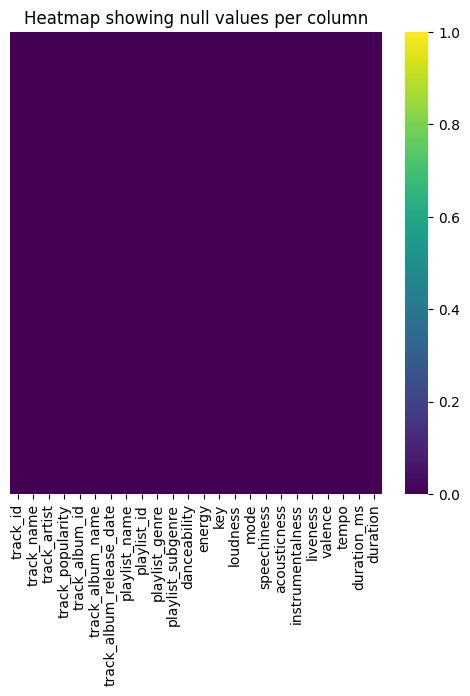

In [10]:
 # Making a heatmap of where there are null values (i.e. null value = True = 1, not a null value = False = 0, with no yticklabels to clutter the yaxis)
plt.figure(figsize = (6,6)) # Setting figure size
sns.heatmap(df_spotifysongs.isnull(),yticklabels=False,cbar=True,cmap='viridis')
plt.title("Heatmap showing null values per column")
plt.show()

Heatmap shows that there are not many null values. However, run a check for any null values below.

In [11]:
# Checking how many null values there are in the dataset

df_spotifysongs.isnull().sum()

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
duration                    0
dtype: int64

In [12]:
# Getting all the rows with null values
null_mask = df_spotifysongs.isnull().any(axis=1)
null_rows = df_spotifysongs[null_mask]

null_rows

track_id track_name track_artist  track_popularity  \
8151   69gRFGOWY9OMpFJgFol1u0        NaN          NaN                 0   
9282   5cjecvX0CmC9gK0Laf5EMQ        NaN          NaN                 0   
9283   5TTzhRSWQS4Yu8xTgAuq6D        NaN          NaN                 0   
19568  3VKFip3OdAvv4OfNTgFWeQ        NaN          NaN                 0   
19811  69gRFGOWY9OMpFJgFol1u0        NaN          NaN                 0   

               track_album_id track_album_name track_album_release_date  \
8151   717UG2du6utFe7CdmpuUe3              NaN               2012-01-05   
9282   3luHJEPw434tvNbme3SP8M              NaN               2017-12-01   
9283   3luHJEPw434tvNbme3SP8M              NaN               2017-12-01   
19568  717UG2du6utFe7CdmpuUe3              NaN               2012-01-05   
19811  717UG2du6utFe7CdmpuUe3              NaN               2012-01-05   

            playlist_name             playlist_id playlist_genre  ...  \
8151              HIP&HOP  5DyJsJZOpMJh34WvUrQzMV            rap  ...   
9282          GANGSTA Rap  5GA8GDo7RQC3JEanT81B3g            rap  ...   
9283          GANGSTA Rap  5GA8GDo7RQC3JEanT81B3g            rap  ...   
19568  Reggaeton viejito🔥  0si5tw70PIgPkY1Eva6V8f          latin  ...   
19811       latin hip hop  3nH8aytdqNeRbcRCg3dw9q          latin  ...   

      loudness  mode  speechiness  acousticness  instrumentalness  liveness  \
8151    -7.635     1       0.1760        0.0410           0.00000    0.1160   
9282    -5.364     0       0.3190        0.0534           0.00000    0.5530   
9283    -5.907     0       0.3070        0.0963           0.00000    0.0888   
19568   -6.075     0       0.0366        0.0606           0.00653    0.1030   
19811   -7.635     1       0.1760        0.0410           0.00000    0.1160   

       valence    tempo  duration_ms  duration  
8151     0.649   95.999       282707   282.707  
9282     0.191  146.153       202235   202.235  
9283     0.505   86.839       206465   206.465  
19568    0.726   97.017       252773   252.773  
19811    0.649   95.999       282707   282.707  

[5 rows x 24 columns]

All null rows are found within 5 rows which is negligible relative to the total of 32833 rows. These rows do not have a track name or track artist. As all null values are found in these 5 rows and the number of rows is negligible, these rows can be dropped. Furthermore, we can remove the columns not being analysed such as track_album_id, track_album_name, playlist_name, and playlist_id.

In [13]:
nonull_spotifysongs = df_spotifysongs[['track_id',
                                    'track_name',
                                    'track_artist',
                                    'track_popularity',
                                    'track_album_release_date',
                                    'playlist_genre',
                                    'danceability',
                                    'energy',
                                    'key',
                                    'loudness',
                                    'mode',
                                    'speechiness',
                                    'acousticness',
                                    'instrumentalness',
                                    'liveness',
                                    'valence',
                                    'tempo',
                                    'duration']].dropna()

In [14]:
# Checking for any more null values
nonull_spotifysongs.isnull().sum()

track_id                    0
track_name                  0
track_artist                0
track_popularity            0
track_album_release_date    0
playlist_genre              0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration                    0
dtype: int64

#### Removing Duplicates

In [15]:
# Identifying duplicate tracks
duplicate_tracks =  nonull_spotifysongs[nonull_spotifysongs.duplicated()]
print("There are {} duplicated tracks.".format(duplicate_tracks.shape[0]))
duplicate_tracks.head(1)

There are 2448 duplicated tracks.


track_id           track_name  track_artist  \
1299  1HfMVBKM75vxSfsQ5VefZ5  LOSE YOU TO LOVE ME  SELENA GOMEZ   

      track_popularity track_album_release_date playlist_genre  danceability  \
1299                93               2019-10-23            pop         0.505   

      energy  key  loudness  mode  speechiness  acousticness  \
1299    0.34    4    -9.005     1       0.0438         0.576   

      instrumentalness  liveness  valence    tempo  duration  
1299               0.0      0.21   0.0916  101.993   206.459

In [16]:
# Inspecting a sample of 1 to check if the whole row is duplicated
nonull_spotifysongs[nonull_spotifysongs['track_id']=='1HfMVBKM75vxSfsQ5VefZ5']

track_id           track_name  track_artist  \
739    1HfMVBKM75vxSfsQ5VefZ5  LOSE YOU TO LOVE ME  SELENA GOMEZ   
1299   1HfMVBKM75vxSfsQ5VefZ5  LOSE YOU TO LOVE ME  SELENA GOMEZ   
18320  1HfMVBKM75vxSfsQ5VefZ5  LOSE YOU TO LOVE ME  SELENA GOMEZ   
19730  1HfMVBKM75vxSfsQ5VefZ5  LOSE YOU TO LOVE ME  SELENA GOMEZ   
21555  1HfMVBKM75vxSfsQ5VefZ5  LOSE YOU TO LOVE ME  SELENA GOMEZ   
23641  1HfMVBKM75vxSfsQ5VefZ5  LOSE YOU TO LOVE ME  SELENA GOMEZ   
30388  1HfMVBKM75vxSfsQ5VefZ5  LOSE YOU TO LOVE ME  SELENA GOMEZ   

       track_popularity track_album_release_date playlist_genre  danceability  \
739                  93               2019-10-23            pop         0.505   
1299                 93               2019-10-23            pop         0.505   
18320                93               2019-10-23          latin         0.505   
19730                93               2019-10-23          latin         0.505   
21555                93               2019-10-23            r&b         0.505   
23641                93               2019-10-23            r&b         0.505   
30388                93               2019-10-23            edm         0.505   

       energy  key  loudness  mode  speechiness  acousticness  \
739      0.34    4    -9.005     1       0.0438         0.576   
1299     0.34    4    -9.005     1       0.0438         0.576   
18320    0.34    4    -9.005     1       0.0438         0.576   
19730    0.34    4    -9.005     1       0.0438         0.576   
21555    0.34    4    -9.005     1       0.0438         0.576   
23641    0.34    4    -9.005     1       0.0438         0.576   
30388    0.34    4    -9.005     1       0.0438         0.576   

       instrumentalness  liveness  valence    tempo  duration  
739                 0.0      0.21   0.0916  101.993   206.459  
1299                0.0      0.21   0.0916  101.993   206.459  
18320               0.0      0.21   0.0916  101.993   206.459  
19730               0.0      0.21   0.0916  101.993   206.459  
21555               0.0      0.21   0.0916  101.993   206.459  
23641               0.0      0.21   0.0916  101.993   206.459  
30388               0.0      0.21   0.0916  101.993   206.459

In [17]:
# Removing duplicates from the data based on if they are the same track - for analysis across the entire dataframe regardless of genre
# This means only one genre is kept per song.
spotifysongs = nonull_spotifysongs.drop_duplicates(subset=['track_id'])
spotifysongs[spotifysongs['track_id']=='1HfMVBKM75vxSfsQ5VefZ5']

track_id           track_name  track_artist  \
739  1HfMVBKM75vxSfsQ5VefZ5  LOSE YOU TO LOVE ME  SELENA GOMEZ   

     track_popularity track_album_release_date playlist_genre  danceability  \
739                93               2019-10-23            pop         0.505   

     energy  key  loudness  mode  speechiness  acousticness  instrumentalness  \
739    0.34    4    -9.005     1       0.0438         0.576               0.0   

     liveness  valence    tempo  duration  
739      0.21   0.0916  101.993   206.459

In [18]:
# Removing duplicates of songs that are in the same genre - for analysis by genre
# This drops rows with exactly the same rows, so will keep each song for different genres
bygenre = nonull_spotifysongs.drop_duplicates()
bygenre[bygenre['track_id']=='1HfMVBKM75vxSfsQ5VefZ5']

track_id           track_name  track_artist  \
739    1HfMVBKM75vxSfsQ5VefZ5  LOSE YOU TO LOVE ME  SELENA GOMEZ   
18320  1HfMVBKM75vxSfsQ5VefZ5  LOSE YOU TO LOVE ME  SELENA GOMEZ   
21555  1HfMVBKM75vxSfsQ5VefZ5  LOSE YOU TO LOVE ME  SELENA GOMEZ   
30388  1HfMVBKM75vxSfsQ5VefZ5  LOSE YOU TO LOVE ME  SELENA GOMEZ   

       track_popularity track_album_release_date playlist_genre  danceability  \
739                  93               2019-10-23            pop         0.505   
18320                93               2019-10-23          latin         0.505   
21555                93               2019-10-23            r&b         0.505   
30388                93               2019-10-23            edm         0.505   

       energy  key  loudness  mode  speechiness  acousticness  \
739      0.34    4    -9.005     1       0.0438         0.576   
18320    0.34    4    -9.005     1       0.0438         0.576   
21555    0.34    4    -9.005     1       0.0438         0.576   
30388    0.34    4    -9.005     1       0.0438         0.576   

       instrumentalness  liveness  valence    tempo  duration  
739                 0.0      0.21   0.0916  101.993   206.459  
18320               0.0      0.21   0.0916  101.993   206.459  
21555               0.0      0.21   0.0916  101.993   206.459  
30388               0.0      0.21   0.0916  101.993   206.459

In [19]:
# Inspecting how many rows I have dropped
nonull = nonull_spotifysongs.shape[0]
print("Before dropping duplicates, there were {} tracks.".format(nonull))

# For analysis across the entire dataframe regardless of genre
print("Dropping all duplicate songs across the entire dataframe regardless of genre, there are {} tracks, having removed {} duplicates.".format(spotifysongs.shape[0], nonull-spotifysongs.shape[0]))

# For analysis by genre
print("On dropping all duplicate songs within each playlist genre, there are {} tracks, having removed {} duplicates.".format(bygenre.shape[0], nonull-bygenre.shape[0]))

Before dropping duplicates, there were 32828 tracks.
Dropping all duplicate songs across the entire dataframe regardless of genre, there are 28352 tracks, having removed 4476 duplicates.
On dropping all duplicate songs within each playlist genre, there are 30380 tracks, having removed 2448 duplicates.


Some analysis is based on genre - it is noted that the category in this dataframe is 'playlist genre' and as such may not always reflect the genre of the song itself.

#### Data Dictionary
For the full data dictionary, please refer to : https://www.kaggle.com/datasets/joebeachcapital/30000-spotify-songs/data

For numerical attributes, a summary of the values:

| Attribute | Values | Description |
|:---:|:---:|:---|
| Track_popularity | 0 - 100 | Higher is more popular. |
| Danceability| 0 - 1 | Suitability of a track for dancing based on tempo, rhythm stability, beat strength and overall regularity. 0 is least danceable and 1 is most danceable. |
| Energy | 0 - 1 | Perceptual measure of intensity and activity, where high energy is for faster and louder tracks. Perceptual features include dynamic range, perceived loudness, timbre, onset rate, and general entropy (wildness).|
|Key| -1, 0 - 12 | Estimated overall key of the track, whereby integers match to pitches, e.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. No key detected is -1. |
|Loudness| -60 - 0 / dB | Average volume for the entire track. |
| Mode | 0 - 1 | Modality of the melody, where a major-based melody is 1, and minor-based melody is 0. |
| Speechiness | 0 - 1 | Indicator of presence of spoken words in a track. If a track is predominantly speech (e.g. talk show, audio book), the value is closer to 1. <br> Values below 0.33 indicates no spoken word, such as songs, instrumental music. <br> Values between 0.33 and 0.66 indicate tracks contain both music and speech, e.g. rap. <br> Values with 0.66 to 1 indicates the track is predominantly spoken word. |
| Acousticness | 0 - 1 | A confidence measure for if a track is acoustic. 1 means track is highly likely to be acoustic. |
| Instrumentalness | 0 - 1 | Predictive measure indicating if a track contains vocals, where 'ooh's and 'ah's are treated as instrumental. <br> Rap or spoken word is counted as vocal. A value of 1 means less vocals and more likely to be instrumental, with higher confidence in predictive values when closer to 1.0. <br> Values from 0-0.5 have vocal content. <br> Values from 0.5-1.0 are likely to be instrumental with no vocal content. |
| Liveness | 0 - 1 | The higher the value, the increased probability the track was performed live with an audience. <br> Values above 0.8 are a strong predictor of a live track. |
| Valence | 0 - 1 | Value indicating the musical positiveness of a track, whereby the valence increases with positiveness. |
| Tempo | 0 - 240 / bpm | Overall estimated tempo of a track, which is gives the relative speed of a track.|
| Duration_ms | 0 - 520000 / ms | Duration of songs in milliseconds. |

In [20]:
# Getting the minimum and maximum values
numericals = nonull_spotifysongs.iloc[:, 11:23]
numericals['track_popularity'] = nonull_spotifysongs['track_popularity']
maximums = pd.Series(numericals.max(), name='Maximum values')
minimums = pd.Series(numericals.min(), name='Minimum values')

min_max = pd.concat([minimums, maximums], axis=1)
min_max

Minimum values  Maximum values
speechiness                  0.0           0.918
acousticness                 0.0           0.994
instrumentalness             0.0           0.994
liveness                     0.0           0.996
valence                      0.0           0.991
tempo                        0.0         239.440
duration                     4.0         517.810
track_popularity             0.0         100.000

Getting an idea of the minimums and maximums of the data. As per the data dictionary, the magnitude of values differs, with the majority of columns varying from 0 to 1, and tempo, duration, and track popularity being of larger magnitudes.

### Data pre-processing for data across decades

In [21]:
df_top10 = pd.read_csv("/content/drive/MyDrive/top10s.csv", encoding='latin-1')

In [22]:
df_top10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  603 non-null    int64 
 1   title       603 non-null    object
 2   artist      603 non-null    object
 3   top genre   603 non-null    object
 4   year        603 non-null    int64 
 5   bpm         603 non-null    int64 
 6   nrgy        603 non-null    int64 
 7   dnce        603 non-null    int64 
 8   dB          603 non-null    int64 
 9   live        603 non-null    int64 
 10  val         603 non-null    int64 
 11  dur         603 non-null    int64 
 12  acous       603 non-null    int64 
 13  spch        603 non-null    int64 
 14  pop         603 non-null    int64 
dtypes: int64(12), object(3)
memory usage: 70.8+ KB


In [23]:
df_top10.isnull().sum()

# No null values found in the top 10 dataset

Unnamed: 0    0
title         0
artist        0
top genre     0
year          0
bpm           0
nrgy          0
dnce          0
dB            0
live          0
val           0
dur           0
acous         0
spch          0
pop           0
dtype: int64

In [24]:
# Changing to upper case
df_top10['artist'] = df_top10['artist'].str.upper()

In [25]:
# Convert 'year' column to datetime type
df_top10['year'] = pd.to_datetime(df_top10['year'], format='%Y')

### Data pre-processing of top songs of 2023

In [26]:
df_spotify23 = pd.read_csv("/content/drive/MyDrive/spotify-2023.csv", encoding='latin-1')

***Data summary***

In [27]:
df_spotify23

track_name      artist(s)_name  artist_count  \
0    Seven (feat. Latto) (Explicit Ver.)    Latto, Jung Kook             2   
1                                   LALA         Myke Towers             1   
2                                vampire      Olivia Rodrigo             1   
3                           Cruel Summer        Taylor Swift             1   
4                         WHERE SHE GOES           Bad Bunny             1   
..                                   ...                 ...           ...   
948                         My Mind & Me        Selena Gomez             1   
949            Bigger Than The Whole Sky        Taylor Swift             1   
950                 A Veces (feat. Feid)  Feid, Paulo Londra             2   
951                        En La De Ella  Feid, Sech, Jhayco             3   
952                                Alone           Burna Boy             1   

     released_year  released_month  released_day  in_spotify_playlists  \
0             2023               7            14                   553   
1             2023               3            23                  1474   
2             2023               6            30                  1397   
3             2019               8            23                  7858   
4             2023               5            18                  3133   
..             ...             ...           ...                   ...   
948           2022              11             3                   953   
949           2022              10            21                  1180   
950           2022              11             3                   573   
951           2022              10            20                  1320   
952           2022              11             4                   782   

     in_spotify_charts    streams  in_apple_playlists  ...  bpm key   mode  \
0                  147  141381703                  43  ...  125   B  Major   
1                   48  133716286                  48  ...   92  C#  Major   
2                  113  140003974                  94  ...  138   F  Major   
3                  100  800840817                 116  ...  170   A  Major   
4                   50  303236322                  84  ...  144   A  Minor   
..                 ...        ...                 ...  ...  ...  ..    ...   
948                  0   91473363                  61  ...  144   A  Major   
949                  0  121871870                   4  ...  166  F#  Major   
950                  0   73513683                   2  ...   92  C#  Major   
951                  0  133895612                  29  ...   97  C#  Major   
952                  2   96007391                  27  ...   90   E  Minor   

    danceability_%  valence_% energy_% acousticness_%  instrumentalness_%  \
0               80         89       83             31                   0   
1               71         61       74              7                   0   
2               51         32       53             17                   0   
3               55         58       72             11                   0   
4               65         23       80             14                  63   
..             ...        ...      ...            ...                 ...   
948             60         24       39             57                   0   
949             42          7       24             83                   1   
950             80         81       67              4                   0   
951             82         67       77              8                   0   
952             61         32       67             15                   0   

     liveness_%  speechiness_%  
0             8              4  
1            10              4  
2            31              6  
3            11             15  
4            11              6  
..          ...            ...  
948           8              3  
949          12              6  
950           8              6  
951         

In [28]:
df_spotify23.shape

(953, 24)

In [29]:
df_spotify23.head()

track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts    streams  in_apple_playlists  ...  bpm key   mode  \
0                147  141381703                  43  ...  125   B  Major   
1                 48  133716286                  48  ...   92  C#  Major   
2                113  140003974                  94  ...  138   F  Major   
3                100  800840817                 116  ...  170   A  Major   
4                 50  303236322                  84  ...  144   A  Minor   

  danceability_%  valence_% energy_% acousticness_%  instrumentalness_%  \
0             80         89       83             31                   0   
1             71         61       74              7                   0   
2             51         32       53             17                   0   
3             55         58       72             11                   0   
4             65         23       80             14                  63   

   liveness_%  speechiness_%  
0           8              4  
1          10              4  
2          31              6  
3          11             15  
4          11              6  

[5 rows x 24 columns]

In [30]:
df_spotify23.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

#### Null values

In [31]:
print(df_spotify23.isnull().sum())

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64


There are 50 tracks which are NULL in Shazam Charts; there are 95 which are NULL in Key

In [32]:
df_spotify23[df_spotify23.isnull().any(axis=1)]

track_name  \
12                                             Flowers   
14                                           As It Was   
17   What Was I Made For? [From The Motion Picture ...   
22                                    I Wanna Be Yours   
35                                     Los del Espacio   
..                                                 ...   
901                                         After LIKE   
903              B.O.T.A. (Baddest Of Them All) - Edit   
927                I Really Want to Stay at Your House   
938                                          Labyrinth   
940                                      Sweet Nothing   

                                        artist(s)_name  artist_count  \
12                                         Miley Cyrus             1   
14                                        Harry Styles             1   
17                                       Billie Eilish             1   
22                                      Arctic Monkeys             1   
35   Big One, Duki, Lit Killah, Maria Becerra, FMK,...             8   
..                                                 ...           ...   
901                                                IVE             1   
903                Interplanetary Criminal, Eliza Rose             2   
927                        Rosa Walton, Hallie Coggins             2   
938                                       Taylor Swift             1   
940                                       Taylor Swift             1   

     released_year  released_month  released_day  in_spotify_playlists  \
12            2023               1            12                 12211   
14            2022               3            31                 23575   
17            2023               7            13                   873   
22            2013               1             1                 12859   
35            2023               6             1                  1150   
..             ...             ...           ...                   ...   
901           2022               8            22                   767   
903           2022               6            15                  5153   
927           2020              12            18                   668   
938           2022              10            21                  1597   
940           2022              10            21                  1747   

     in_spotify_charts     streams  in_apple_playlists  ...  bpm  key   mode  \
12                 115  1316855716                 300  ...  118  NaN  Major   
14                 130  2513188493                 403  ...  174   F#  Minor   
17                 104    30546883                  80  ...   78  NaN  Major   
22                 110  1297026226                  24  ...  135  NaN  Minor   
35                  31   123122413                  22  ...  120  NaN  Major   
..                 ...         ...                 ...  ...  ...  ...    ...   
901                 12   265548837                  20  ...  125  NaN  Major   
903                  6   244585109                 102  ...  137  NaN  Major   
927                  1   140430339                   0  ...  125   D#  Minor   
938                  0   187339835                   6  ...  110  NaN  Major   
940                  0   186104310                   9  ...  177  NaN  Major   

    danceability_%  valence_% energy_% acousticness_%  instrumentalness_%  \
12              71         65       68              6                   0   
14              52         66       73             34                   0   
17              44         14        9             96                   0   
22              48         44       42             12                   2   
35              81         63       68             11                   0   
..             ...        ...      ...            ...                 ...   
901             68         80       92             10                   0   
903             

In [33]:
round(df_spotify23.groupby('key')['key'].count()/df_spotify23.shape[0],2)

key
A     0.08
A#    0.06
B     0.08
C#    0.13
D     0.08
D#    0.03
E     0.07
F     0.09
F#    0.08
G     0.10
G#    0.10
Name: key, dtype: float64

As there are 140 missing values out of 953 rows (15%), imputing the missing values with the modal key would distort the results, especially as the keys are fairly distributed. Instead, we use 'bfill', which fills null values with the next valid observation. Given the null rows seem to be fairly distanced and there is a variety of keys, this is deemed appropriate.

In [34]:
df_spotify23['key'].bfill(inplace=True)

In [35]:
# Checking that the distribution of keys is still fairly similar
round(df_spotify23.groupby('key')['key'].count()/df_spotify23.shape[0],2)

key
A     0.08
A#    0.07
B     0.10
C#    0.14
D     0.09
D#    0.04
E     0.07
F     0.10
F#    0.09
G     0.11
G#    0.11
Name: key, dtype: float64

##### Shazam column null values

In [36]:
df_spotify23[df_spotify23.isnull().any(axis=1)].sample(5)

track_name  \
14                   As It Was   
501                  Sacrifice   
429                 Bad Habits   
506  We Don't Talk About Bruno   
449                    Snowman   

                                        artist(s)_name  artist_count  \
14                                        Harry Styles             1   
501                                         The Weeknd             1   
429                                         Ed Sheeran             1   
506  Adassa, Mauro Castillo, Stephanie Beatriz, Enc...             7   
449                                                Sia             1   

     released_year  released_month  released_day  in_spotify_playlists  \
14            2022               3            31                 23575   
501           2022               1             7                  4440   
429           2020               9             3                 12755   
506           2021              11            19                  2785   
449           2017               1             1                  5140   

     in_spotify_charts     streams  in_apple_playlists  ...  bpm key   mode  \
14                 130  2513188493                 403  ...  174  F#  Minor   
501                  0   326792833                  81  ...  122   G  Major   
429                  8  1555511105                 344  ...  126   B  Minor   
506                  0   432719968                  95  ...  206   G  Minor   
449                  0   690104769                  85  ...  105  C#  Major   

    danceability_%  valence_% energy_% acousticness_%  instrumentalness_%  \
14              52         66       73             34                   0   
501             70         91       79              3                   0   
429             81         59       90              5                   0   
506             58         83       45             36                   0   
449             72         33       51             48                   0   

     liveness_%  speechiness_%  
14           31              6  
501           7             10  
429          36              3  
506          11              8  
449           9              3  

[5 rows x 24 columns]

In [37]:
# Count the number of tracks for each release year
df_spotify23[df_spotify23['in_shazam_charts'].isnull()==True]

track_name  \
14                                As It Was   
54                             Another Love   
55                          Blinding Lights   
71                               Heat Waves   
73                          Sweater Weather   
86                        Someone You Loved   
127                        Watermelon Sugar   
158                                   Ghost   
159                     Under The Influence   
180                           Night Changes   
243                             Unstoppable   
274                                 Shivers   
320                      Gangsta's Paradise   
392                               Calm Down   
395                              Space Song   
403                One Kiss (with Dua Lipa)   
410       INDUSTRY BABY (feat. Jack Harlow)   
429                              Bad Habits   
434                                   Woman   
440                                Payphone   
441         All I Want for Christmas Is You   
442                          Last Christmas   
443       Rockin' Around The Christmas Tree   
444                        Jingle Bell Rock   
446                           Santa Tell Me   
449                                 Snowman   
500                              ýýýabcdefu   
501                               Sacrifice   
504                             Out of Time   
506               We Don't Talk About Bruno   
507                                   Pepas   
513                                good 4 u   
518                            Need To Know   
519          MONTERO (Call Me By Your Name)   
520                love nwantiti (ah ah ah)   
529                                   MONEY   
531                       Happier Than Ever   
532       Moth To A Flame (with The Weeknd)   
533                                 traitor   
534                                   Toxic   
535                         drivers license   
549                   Love Nwantiti - Remix   
554  Peaches (feat. Daniel Caesar & Giveon)   
560                            Life Goes On   
566                                Dynamite   
584                  Mood (feat. Iann Dior)   
620                            Dance Monkey   
625                                  Arcade   
727            Somebody That I Used To Know   
927     I Really Want to Stay at Your House   

                                        artist(s)_name  artist_count  \
14                                        Harry Styles             1   
54                                           Tom Odell             1   
55                                          The Weeknd             1   
71                                       Glass Animals             1   
73                                   The Neighbourhood             1   
86                                       Lewis Capaldi             1   
127                                       Harry Styles             1   
158                                      Justin Bieber             1   
159                                        Chris Brown             1   
180                                      One Direction             1   
243                                                Sia             1   
274                                         Ed Sheeran             1   
320                                       Coolio, L.V.             2   
392                                              Rï¿½ï             1   
395                                        Beach House             1   
403                            Calvin Harris, Dua Lipa             2   
410                             Jack Harlow, Lil Nas X             2   
429                                         Ed Sheeran             1   
434                                           Doja Cat             1   
440                              Maroon 5, Wiz Khalifa             2   
441                                       Mariah Carey             1   
442                                              Wh

As the numbers are very low in earlier years, filling the null values with an average would not necessarily fit the data well. Therefore, in this case, the rows will be dropped, which will only affect around 5% of the dataset.

In [38]:
df_spotify23 = df_spotify23.dropna()

#### Data formatting

In [39]:
data_type = df_spotify23['in_shazam_charts'].dtype
print(data_type)

object


'In shazam chart' is an object so we cannot directly do numerical analysis or create a correlation matrix between that and the musical attributes that are numbers. So we examined in_shazam_chart to find out if we can change it to number.





In [40]:
unique_values = df_spotify23['in_shazam_charts'].unique()
print(unique_values)

['826' '382' '949' '548' '425' '946' '418' '194' '953' '339' '251' '168'
 '1,021' '1,281' '187' '0' '1,173' '29' '150' '73' '139' '1,093' '96'
 '211' '325' '294' '197' '27' '310' '354' '184' '212' '81' '82' '100' '62'
 '69' '727' '311' '1,133' '102' '332' '259' '140' '16' '110' '810' '176'
 '615' '210' '216' '215' '167' '37' '171' '272' '529' '26' '5' '169' '230'
 '84' '154' '93' '115' '72' '8' '323' '49' '1,451' '1,170' '429' '162'
 '10' '478' '236' '200' '78' '266' '486' '204' '34' '202' '312' '32' '153'
 '519' '458' '48' '666' '14' '925' '88' '203' '44' '74' '638' '64' '71'
 '2' '3' '136' '148' '22' '368' '1' '189' '52' '9' '31' '66' '208' '28'
 '558' '195' '13' '60' '503' '56' '15' '454' '40' '285' '129' '58' '117'
 '47' '20' '30' '80' '263' '116' '57' '39' '111' '7' '166' '19' '99' '51'
 '109' '42' '33' '675' '348' '36' '240' '113' '6' '23' '4' '182' '54'
 '438' '11' '17' '50' '320' '55' '18' '38' '43' '105' '24' '63' '444' '85'
 '21' '165' '103' '734' '61' '221' '59' '451' '41' '

As it can be seen above, some numbers are in quotation marks so they are strings.

We converted non numberic data to numberic data by removing quotes.

In [41]:
df_spotify23['in_shazam_charts'] = pd.to_numeric(df_spotify23['in_shazam_charts'].str.replace("'", ''), errors='coerce')

<ipython-input-41-8d047a9cf5d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spotify23['in_shazam_charts'] = pd.to_numeric(df_spotify23['in_shazam_charts'].str.replace("'", ''), errors='coerce')


Replacing other incorrectly formatted columns

In [42]:
df_spotify23['streams'] = pd.to_numeric(df_spotify23['streams'].str.replace("'", ''), errors='coerce')
df_spotify23['in_deezer_playlists'] = pd.to_numeric(df_spotify23['in_deezer_playlists'].str.replace("'", ''), errors='coerce')

<ipython-input-42-66a0a5f6b2e2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spotify23['streams'] = pd.to_numeric(df_spotify23['streams'].str.replace("'", ''), errors='coerce')
<ipython-input-42-66a0a5f6b2e2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spotify23['in_deezer_playlists'] = pd.to_numeric(df_spotify23['in_deezer_playlists'].str.replace("'", ''), errors='coerce')


## What is the correlation between song attributes and song popularity?

### Exploratory Data Analysis

In [43]:
round(spotifysongs.describe()[1:].transpose(),2)

mean    std    min     25%     50%     75%     max
track_popularity   39.34  23.70   0.00   21.00   42.00   58.00  100.00
danceability        0.65   0.15   0.00    0.56    0.67    0.76    0.98
energy              0.70   0.18   0.00    0.58    0.72    0.84    1.00
key                 5.37   3.61   0.00    2.00    6.00    9.00   11.00
loudness           -6.82   3.04 -46.45   -8.31   -6.26   -4.71    1.27
mode                0.57   0.50   0.00    0.00    1.00    1.00    1.00
speechiness         0.11   0.10   0.00    0.04    0.06    0.13    0.92
acousticness        0.18   0.22   0.00    0.01    0.08    0.26    0.99
instrumentalness    0.09   0.23   0.00    0.00    0.00    0.01    0.99
liveness            0.19   0.16   0.00    0.09    0.13    0.25    1.00
valence             0.51   0.23   0.00    0.33    0.51    0.70    0.99
tempo             120.96  26.95   0.00   99.97  121.99  134.00  239.44
duration          226.57  61.08   4.00  187.74  216.93  254.98  517.81

In [44]:
round(bygenre.describe()[1:].transpose(),2)

mean    std    min     25%     50%     75%     max
track_popularity   41.01  24.42   0.00   23.00   44.00   60.00  100.00
danceability        0.65   0.15   0.00    0.56    0.67    0.76    0.98
energy              0.70   0.18   0.00    0.58    0.72    0.84    1.00
key                 5.37   3.61   0.00    2.00    6.00    9.00   11.00
loudness           -6.77   3.01 -46.45   -8.23   -6.22   -4.68    1.27
mode                0.57   0.50   0.00    0.00    1.00    1.00    1.00
speechiness         0.11   0.10   0.00    0.04    0.06    0.13    0.92
acousticness        0.18   0.22   0.00    0.02    0.08    0.26    0.99
instrumentalness    0.09   0.23   0.00    0.00    0.00    0.01    0.99
liveness            0.19   0.15   0.00    0.09    0.13    0.25    1.00
valence             0.51   0.23   0.00    0.33    0.51    0.69    0.99
tempo             120.89  26.92   0.00   99.97  121.96  133.98  239.44
duration          225.74  60.28   4.00  187.52  216.00  253.61  517.81

Initial analysis shows that the two datasets have similar descriptive statistics.

In [45]:
spotifysongs.sort_values(by=['track_popularity'], ascending=False).head(5)

track_id       track_name    track_artist  \
1551   2XU0oxnq2qxCpomAAuJY8K     DANCE MONKEY     TONES AND I   
20092  696DnlkuDOXcMAnKlTgXXK          ROXANNE  ARIZONA ZERVAS   
716    0sf12qNH5qcw8qpgymFOqD  BLINDING LIGHTS      THE WEEKND   
1301   21jGcNKet2qwijlDFuPiPb          CIRCLES     POST MALONE   
687    7k4t7uLgtOxPwTpFmtJNTY             TUSA         KAROL G   

       track_popularity track_album_release_date playlist_genre  danceability  \
1551                100               2019-10-17            pop         0.824   
20092                99               2019-10-10          latin         0.621   
716                  98               2019-11-29            pop         0.513   
1301                 98               2019-09-06            pop         0.695   
687                  98               2019-11-07            pop         0.803   

       energy  key  loudness  mode  speechiness  acousticness  \
1551    0.588    6    -6.400     0       0.0924       0.69200   
20092   0.601    6    -5.616     0       0.1480       0.05220   
716     0.796    1    -4.075     1       0.0629       0.00147   
1301    0.762    0    -3.497     1       0.0395       0.19200   
687     0.715    2    -3.280     1       0.2980       0.29500   

       instrumentalness  liveness  valence    tempo  duration  
1551           0.000104    0.1490    0.513   98.027   209.438  
20092          0.000000    0.4600    0.457  116.735   163.636  
716            0.000209    0.0938    0.345  171.017   201.573  
1301           0.002440    0.0863    0.553  120.042   215.280  
687            0.000134    0.0574    0.574  101.085   200.960

### Correlation between attributes and popularity

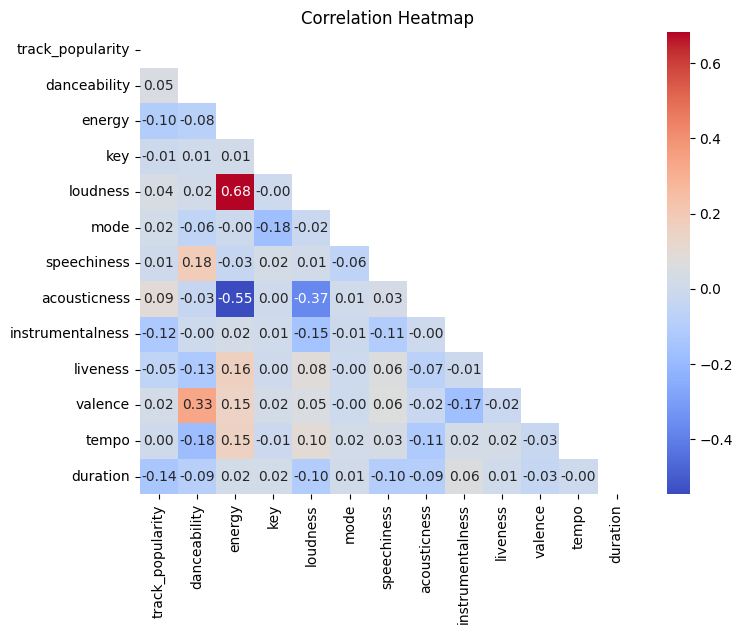

In [46]:
numericals1 = spotifysongs.select_dtypes(include='number')

# Confusion matrix, default method is Pearson
cm = numericals1.corr()

# Mask for upper triangle
mask = np.triu(np.ones_like(numericals1.corr()))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt=".2f", mask=mask)
plt.title('Correlation Heatmap')
plt.show()

In [47]:
# Converting values to absolute values to get the strongest correlations
s = cm.abs().unstack()
so = s.sort_values(kind="quicksort", ascending=False)

print(so[13:23:2])

loudness  energy          0.682164
energy    acousticness    0.545879
loudness  acousticness    0.371601
valence   danceability    0.333751
tempo     danceability    0.184640
dtype: float64


The strongest correlations are between:
- loudness and energy (strong positive),
- acousticness and energy (strong negative),
- loudness and acousticness (moderate negative),
- valence and danceability (moderate positive),
- tempo and danceability (small negativity).

This suggests there is a strong link between loudness, energy and acousticness, whereby songs are more loud and energetic, or quieter and more acoustic.

The analysis also indicates songs for dancing are more positive, and faster songs are less danceable and vice versa. However, the weak correlation between danceable and tempo may be due to some songs that are danceable being slower.

**Attribute correlation to popularity**

In terms of track popularity, the factors with the most effect are duration, instrumentalness, and energy. However, the correlation is still weak, with decreased duration, decreased instrumentalness, and decreased energy weakly in line with higher popularity.

These three attributes will be investigated further.

### Analysis of duration, energy, and instrumentalness versus popularity by genre



First analyse the overall view of popularity across all tracks.

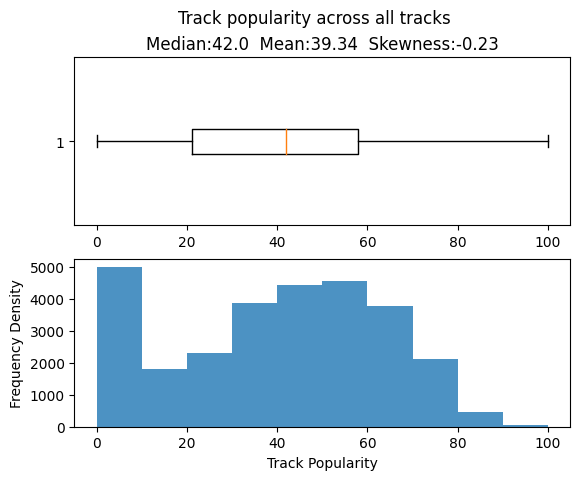

In [48]:
ss_pop_mean = round(np.mean(spotifysongs['track_popularity']),2)
ss_pop_med = round(np.median(spotifysongs['track_popularity']),2)
ss_skew = round(scipy.stats.skew(spotifysongs['track_popularity']),2)

# Using matplotlib to graph boxplots and histograms in two subplots
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle('Track popularity across all tracks')
ax1.boxplot(spotifysongs['track_popularity'], vert=False)
ax1.set_title("Median:{}  Mean:{}  Skewness:{}".format(ss_pop_med, ss_pop_mean, ss_skew))

ax2.hist(spotifysongs['track_popularity'],alpha=0.8)
plt.xlabel("Track Popularity")
plt.ylabel("Frequency Density")
plt.show()

From the histogram alone, the high frequency density for low popularity tracks is surprising. We inspected the data and noted these values were not anomalous and instead show that there are a large number of songs which are not popular within the dataset.

This leads to a small amount of negative skew, whereby the mean is less than the median. The skewness is between 0 and -0.5, suggesting the data is still approximately symmetric. On inspecting the histogram, the negative skew is partly due to the high number of low popular songs, but is also seen from the shape of the graph.

In [49]:
# Number of songs in each playlist genre
bygenre.groupby(['playlist_genre'])['track_name'].count()
# pie chart

playlist_genre
edm      5537
latin    4639
pop      5132
r&b      5138
rap      5483
rock     4451
Name: track_name, dtype: int64

#### Comparing track popularity across genres

In [50]:
genres = spotifysongs['playlist_genre'].unique()

# Colour choices for each genre
col_choices = ['b','r','g','c','m','y']
col_dict = {}
for i in range(len(genres)):
  col_dict[genres[i]] = col_choices[i]


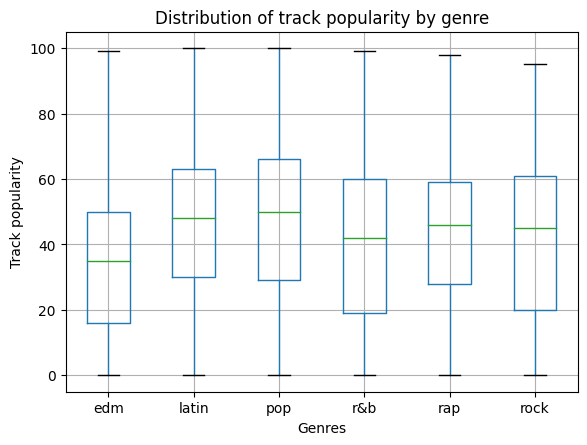

In [51]:
# Using pandas visualisation to see track popularity by genre
bg_axes = bygenre.boxplot(column = 'track_popularity', by='playlist_genre')
fig = bg_axes.get_figure()
fig.suptitle('')
plt.xlabel("Genres")
plt.ylabel("Track popularity")
plt.title("Distribution of track popularity by genre")
plt.show()

Rap and R&B have the widest distributions, whereas rap and latin have the least distributed popularities.

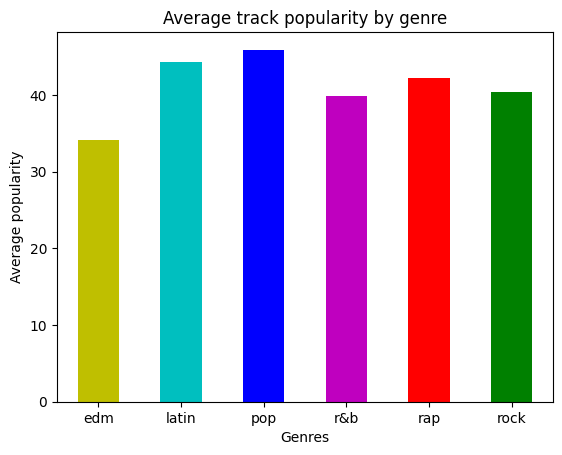

In [52]:
genres_mean = bygenre.groupby('playlist_genre')['track_popularity'].mean()

# Means are returned in alphabetical order, so ordering genres alphabetically
alphabetical = sorted(genres)

# Pandas visualisation bar plot
genres_mean.plot(kind='bar', color=[col_dict[k] for k in alphabetical])
plt.xlabel("Genres")
plt.xticks(rotation=0)
plt.ylabel("Average popularity")
plt.title("Average track popularity by genre")
plt.show()

The mean of of popularities by genre show that on average, pop and latin are more popular, whereas EDM is the least popular.

#### Analysis of attributes by genre: Duration, instrumentalness, energy

##### Duration

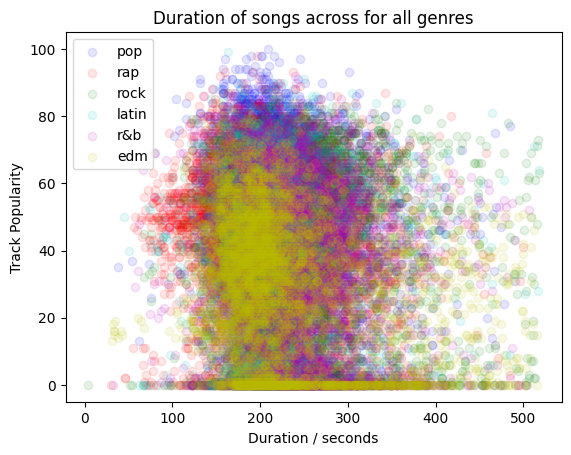

In [53]:
for color, label in zip('brgcmy', ['pop', 'rap', 'rock', 'latin', 'r&b', 'edm']):
  subset = spotifysongs[spotifysongs['playlist_genre'] == label]
  subset
  plt.scatter(subset['duration'], subset['track_popularity'], c=color, label=label, alpha=0.1)
plt.legend()
plt.title("Duration of songs across for all genres")
plt.xlabel("Duration / seconds")
plt.ylabel("Track Popularity")
plt.show()

There are songs from all genres across all durations that are unpopular. From an initial glance, rap and EDM are likely to have shorter durations, and rock appears to have more songs of longer duration above 300 seconds.

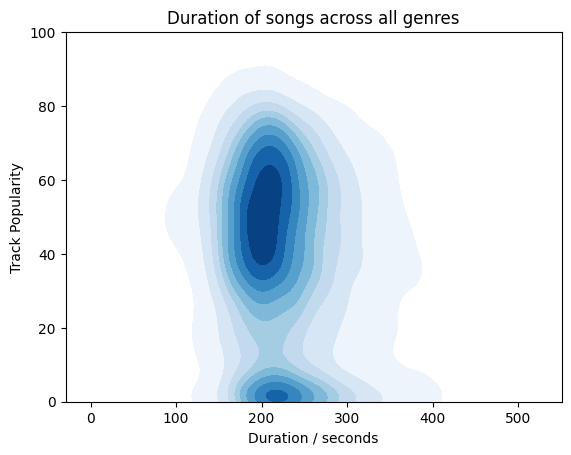

In [54]:
# Plotting distribution plot
sns.kdeplot(x=spotifysongs['duration'],y=spotifysongs['track_popularity'], cmap="Blues", fill=True)
plt.ylim([0, 100])
plt.xlabel("Duration / seconds")
plt.ylabel("Track Popularity")
plt.title("Duration of songs across all genres")

plt.show()

Majority of songs center around 200 seconds (3 minutes 20 seconds) (upper cluster), whereas less popular songs (lower cluster) center at slightly over 200 seconds. Less popular songs also have a greater range of durations.

Pop --> Mean:45.91 Std:24.61
Rap --> Mean:42.24 Std:22.98
Rock --> Mean:40.43 Std:24.46
Latin --> Mean:44.27 Std:24.52
R&B --> Mean:39.84 Std:25.52
Edm --> Mean:34.07 Std:22.71


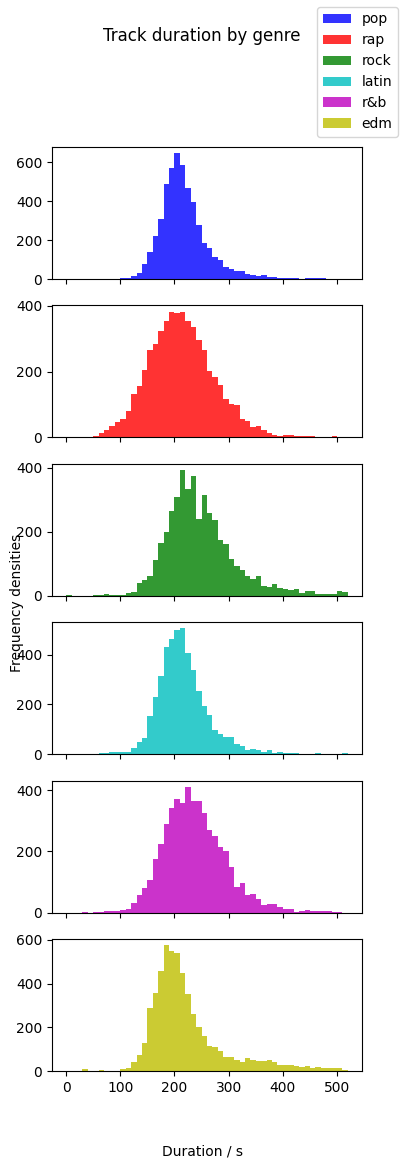

In [55]:
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(4,12), sharex = True)

fig.suptitle('Track duration by genre')
fig.text(0.5, 0.04, 'Duration / s', ha='center')
fig.supylabel('Frequency densities', size=10)

dur_bins = [i for i in range(0,int(bygenre['duration'].max()) + 10, 10)]

for i in range(0,len(genres)):
  by_genre = bygenre[bygenre['playlist_genre']==genres[i]]
  mean = round(np.mean(by_genre.track_popularity),2)
  std = round(np.std(by_genre.track_popularity),2)
  print(str(genres[i].title())+ " --> " + "Mean:{} Std:{}".format(mean, std))
  axes[i].hist(by_genre['duration'], dur_bins, color = col_choices[i], label=genres[i], alpha=0.8)
fig.legend(loc='upper right')
plt.show()

Most genres appear positively skewed, with songs leaning towards shorter durations. The shortest songs are most likely to be EDM.

##### Instrumentalness

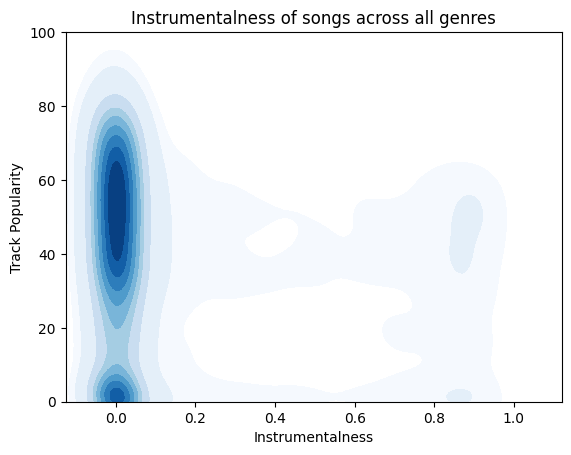

In [56]:
# Plotting distribution plot
sns.kdeplot(x=spotifysongs['instrumentalness'],y=spotifysongs['track_popularity'], cmap="Blues", fill=True)
plt.ylim([0, 100])
plt.xlabel("Instrumentalness")
plt.ylabel("Track Popularity")
plt.title("Instrumentalness of songs across all genres")

plt.show()

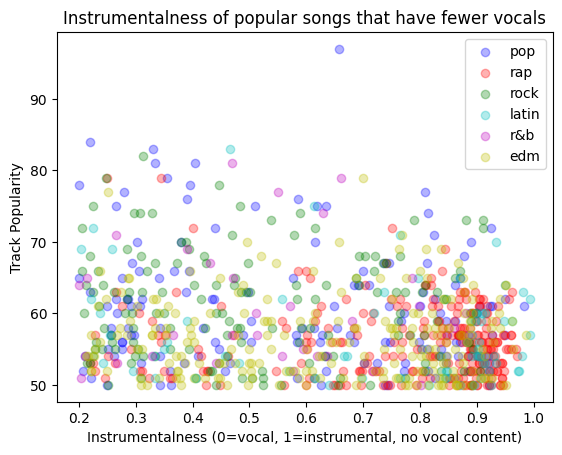

In [57]:
inst_std = np.std(spotifysongs['instrumentalness'])
less_vocal = spotifysongs[(spotifysongs['instrumentalness'] >= 0.2) & (spotifysongs['track_popularity'] >= 50)]

for color, label in zip('brgcmy', ['pop', 'rap', 'rock', 'latin', 'r&b', 'edm']):
  subset = less_vocal[less_vocal['playlist_genre'] == label]
  subset
  plt.scatter(subset['instrumentalness'], subset['track_popularity'], c=color, label=label, alpha=0.3)
plt.legend()
plt.title("Instrumentalness of popular songs that have fewer vocals")
plt.xlabel("Instrumentalness (0=vocal, 1=instrumental, no vocal content)")
plt.ylabel("Track Popularity")
plt.show()

This graph shows that there are a high number of songs in rap playlists that have no vocals and are mostly instrumental. Otherwise, there is a range of genres with varying instrumentalness. This shows that playlists can contain songs that feel similar (e.g. rap and instrumental tracks), but are not the same genre.

In [58]:
less_vocal[(less_vocal['instrumentalness'] >= 0.6) & (less_vocal['track_popularity']>=80)]

track_id           track_name   track_artist  \
689  3ZCTVFBt2Brf31RLEnCkWJ  EVERYTHING I WANTED  BILLIE EILISH   

     track_popularity track_album_release_date playlist_genre  danceability  \
689                97               2019-11-13            pop         0.704   

     energy  key  loudness  mode  speechiness  acousticness  instrumentalness  \
689   0.225    6   -14.454     0       0.0994         0.902             0.657   

     liveness  valence    tempo  duration  
689     0.106    0.243  120.006   245.426

The track with high popularity and instrumentalness around 0.6 is Billie Eilish's 'Everything I wanted'.

##### Energy

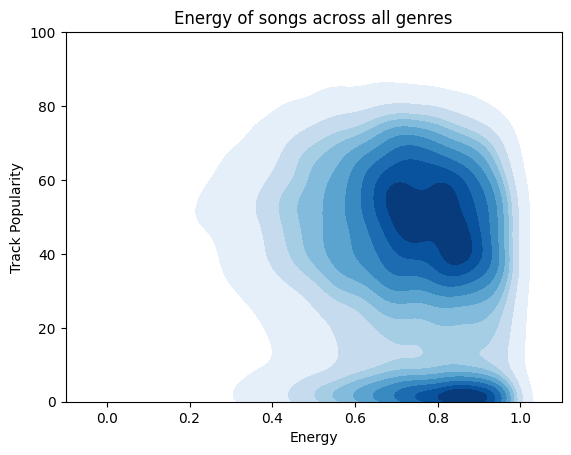

In [59]:
# Plotting distribution plot
sns.kdeplot(x=spotifysongs['energy'],y=spotifysongs['track_popularity'], cmap="Blues", fill=True)
plt.ylim([0, 100])
plt.xlabel("Energy")
plt.ylabel("Track Popularity")
plt.title("Energy of songs across all genres")

plt.show()

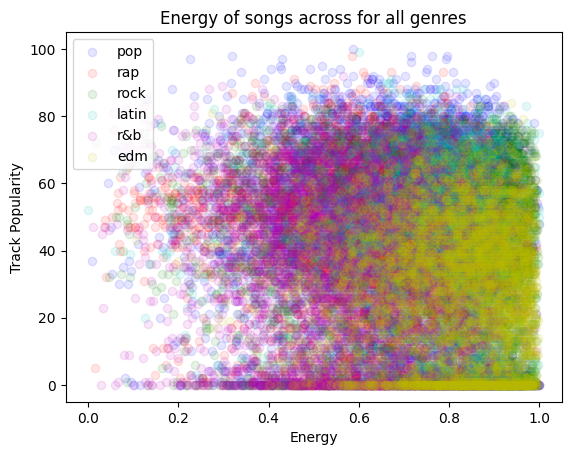

In [60]:
for color, label in zip('brgcmy', ['pop', 'rap', 'rock', 'latin', 'r&b', 'edm']):
  subset = spotifysongs[spotifysongs['playlist_genre'] == label]
  subset
  plt.scatter(subset['energy'], subset['track_popularity'], c=color, label=label, alpha=0.1)
plt.legend()
plt.title("Energy of songs across for all genres")
plt.xlabel("Energy")
plt.ylabel("Track Popularity")
plt.show()

Pop --> Mean:45.91 Std:24.61
Rap --> Mean:42.24 Std:22.98
Rock --> Mean:40.43 Std:24.46
Latin --> Mean:44.27 Std:24.52
R&B --> Mean:39.84 Std:25.52
Edm --> Mean:34.07 Std:22.71


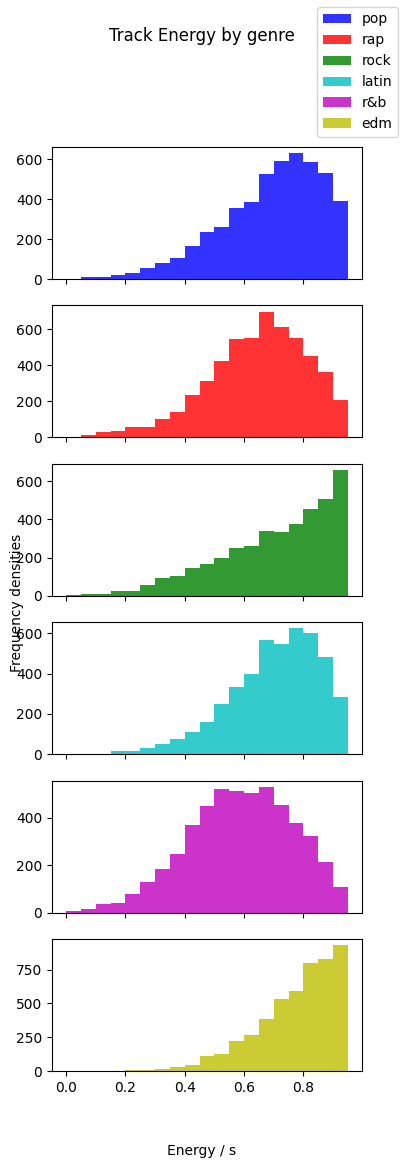

In [61]:
en_fig, en_axes = plt.subplots(nrows=6, ncols=1, figsize=(4,12), sharex = True)

en_fig.suptitle('Track Energy by genre')
en_fig.text(0.5, 0.04, 'Energy / s', ha='center')
en_fig.supylabel('Frequency densities', size=10)

en_bins = [i for i in np.arange(0,1, 0.05)]

for i in range(0,len(genres)):
  by_genre = bygenre[bygenre['playlist_genre']==genres[i]]
  mean = round(np.mean(by_genre.track_popularity),2)
  std = round(np.std(by_genre.track_popularity),2)
  print(str(genres[i].title())+ " --> " + "Mean:{} Std:{}".format(mean, std))
  en_axes[i].hist(by_genre['energy'], bins=en_bins, color = col_choices[i], label=genres[i], alpha=0.8)

en_fig.legend(loc='upper right')
plt.show()

EDM and rock playlists have the highest energy, followed by latin and pop. R&B playlists are the least energetic.

## How have different song attributes and song genre popularity changed over the past decade?

### Exploratory Descriptive Statistics

In [62]:
df_top10.mode()['year'][0]
# Tracks in the top10 dataset are mostly from 2015

Timestamp('2015-01-01 00:00:00')

In [63]:
# Top 10 - maximum and minimum values of attributes

# find min and max of each attribute
df_top10.max(axis=0)
#bpm                            206
#nrgy                            98
#dnce                            97
#dB                              -2
#live                            74
#val                             98
#dur                            424
#acous                           99
#spch                            48
#pop                             99


df_top10.min(axis=0)
#bpm                      0
#nrgy                     0
#dnce                     0
#dB                     -60
#live                     0
#val                      0
#dur                    134
#acous                    0
#spch                     0
#pop                      0

Unnamed: 0                      1
title                  #Beautiful
artist                      3OH!3
top genre            acoustic pop
year          2010-01-01 00:00:00
bpm                             0
nrgy                            0
dnce                            0
dB                            -60
live                            0
val                             0
dur                           134
acous                           0
spch                            0
pop                             0
dtype: object

In [64]:
# Define bins and labels
bpm_bins = [0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220]
bpm_labels = ['0-20', '21-40', '41-60', '61-80', '81-100', '101-120', '121-140', '141-160', '161-180', '180-200', '201-220']

nrgy_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
nrgy_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

dnce_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
dnce_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

dB_bins = [-60, -50, -40, -30, -20, -10, 0]
dB_labels = ['-60 - -50', '-49 - -40', '-39 - -30', '-29 - 20', '-19 - 10', '-9 - 0']

live_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
live_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']

val_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
val_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

acous_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
acous_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

spch_bins = [0, 10, 20, 30, 40, 50]
spch_labels = ['0-10', '11-20', '21-30', '31-40', '41-50']

pop_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
pop_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']


# Create new columns
df_top10['BPM_bin'] = pd.cut(df_top10['bpm'], bins=bpm_bins, labels=bpm_labels, right=False)
df_top10['nrgy_bin'] = pd.cut(df_top10['nrgy'], bins=nrgy_bins, labels=nrgy_labels, right=False)
df_top10['dnce_bin'] = pd.cut(df_top10['dnce'], bins=dnce_bins, labels=dnce_labels, right=False)
df_top10['dB_bin'] = pd.cut(df_top10['dB'], bins=dB_bins, labels=dB_labels, right=False)
df_top10['live_bin'] = pd.cut(df_top10['live'], bins=live_bins, labels=live_labels, right=False)
df_top10['val_bin'] = pd.cut(df_top10['val'], bins=val_bins, labels=val_labels, right=False)
df_top10['acous_bin'] = pd.cut(df_top10['acous'], bins=acous_bins, labels=acous_labels, right=False)
df_top10['spch_bin'] = pd.cut(df_top10['spch'], bins=spch_bins, labels=spch_labels, right=False)
df_top10['pop_bin'] = pd.cut(df_top10['pop'], bins=pop_bins, labels=pop_labels, right=False)

Danceability_%: Percentage indicating how suitable the song is for dancing

valence_%: Positivity of the song's musical content

energy_%: Perceived energy level of the song

acousticness_%: Amount of acoustic sound in the song
instrumentalness_%: Amount of instrumental content in the song

liveness_%: Presence of live performance elements

speechiness_%: Amount of spoken words in the song

In [65]:
df_top10.mode()['BPM_bin'][0]
# Mode BPM is 121-140

'121-140'

In [66]:
df_top10.mode()['nrgy_bin'][0]
# Mode Energy is 81-90

'81-90'

In [67]:
df_top10.mode()['dnce_bin'][0]
# Mode Danceability is 61-70

'61-70'

In [68]:
df_top10.mode()['dB_bin'][0]
# Mode dB is -9 to 0

'-9 - 0'

In [69]:
df_top10.mode()['live_bin'][0]
# Mode liveness is 11-20

'11-20'

In [70]:
df_top10.mode()['val_bin'][0]
# Mode valence is 51-60

'51-60'

In [71]:
df_top10.mode()['acous_bin'][0]
# Mode Acousticness is 0-10

'0-10'

In [72]:
df_top10.mode()['spch_bin'][0]
# Mode Speechiness is 0-10

'0-10'

In [73]:
df_top10.mode()['pop_bin'][0]
# Mode Pop is 71-80

'71-80'

### Analysis of changing attributes over the last decade

In [74]:
# Group by year and calculate the mean for each attribute
df_mean_attributes = df_top10.groupby('year').mean()

<ipython-input-74-963b564d9475>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_mean_attributes = df_top10.groupby('year').mean()


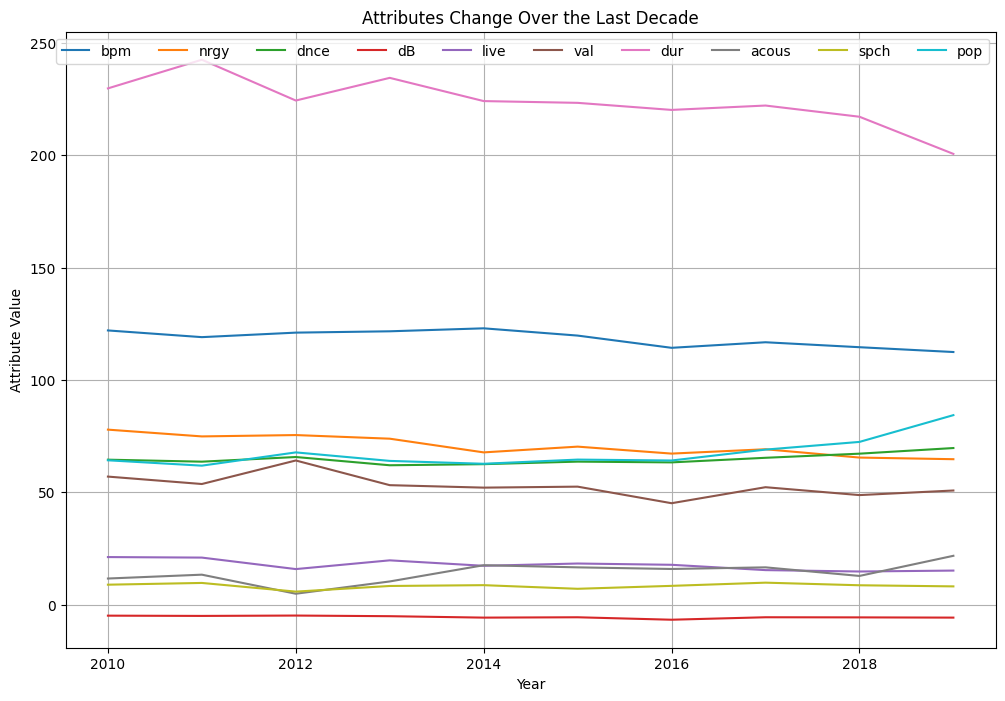

In [75]:
# Plotting line graphs for each attribute
plt.figure(figsize=(12, 8))
# Loop through each attribute and plot a line graph
attributes = ['bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch', 'pop']
for attribute in attributes:
    plt.plot(df_mean_attributes.index.year, df_mean_attributes[attribute], label=attribute)

plt.title('Attributes Change Over the Last Decade')
plt.xlabel('Year')
plt.ylabel('Attribute Value')
plt.legend(loc='upper right', ncol=len(attributes))
plt.grid(True)
plt.show()

**INSIGHTS:**

*Between 2010 and 2019, song attributes have remained fairly similar. Since 2014, song duration has decreased slightly - this might be due to a number of reasons, including reduced attention span due to the increase in social media, and cost-savings associated with producing shorter tracks.*

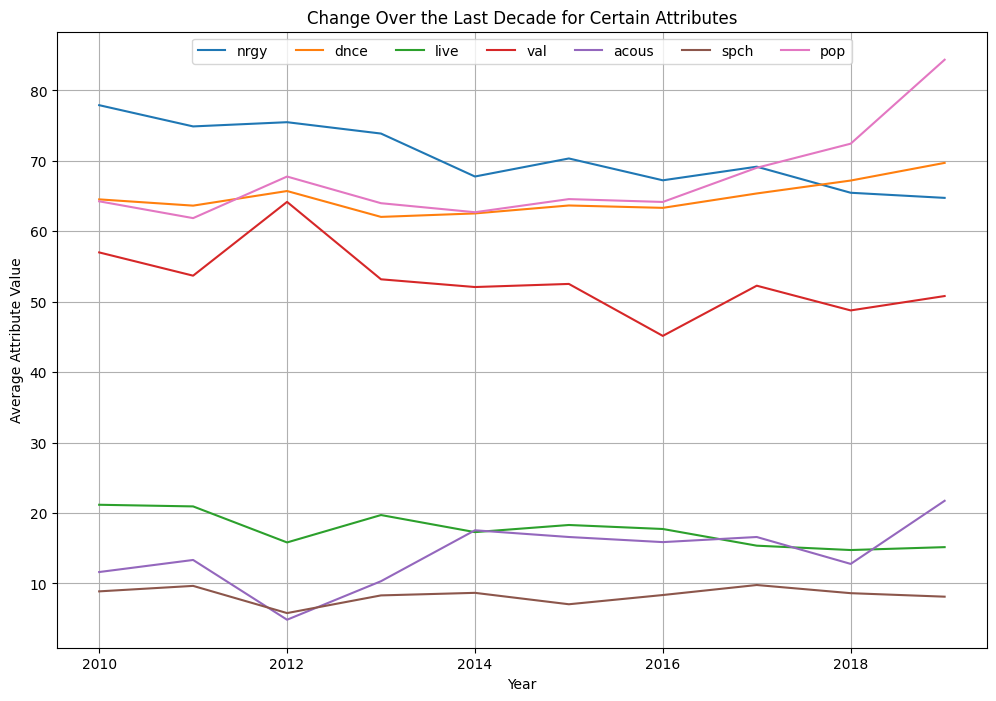

In [76]:
# Plotting line graphs for each attribute
plt.figure(figsize=(12, 8))
# Loop through each attribute and plot a line graph
attributes = ['nrgy', 'dnce', 'live', 'val', 'acous', 'spch', 'pop']
for attribute in attributes:
    plt.plot(df_mean_attributes.index.year, df_mean_attributes[attribute], label=attribute)

plt.title('Change Over the Last Decade for Certain Attributes')
plt.xlabel('Year')
plt.ylabel('Average Attribute Value')
plt.legend(loc='upper center', ncol=len(attributes))
plt.grid(True)
plt.show()

On closer inspection, it appears that there is a downwards trend in energy, and to a lesser extent liveness. A downwards trend in energy may be due to more subdued, calmer pop tunes, as well as ballads becoming more popular.

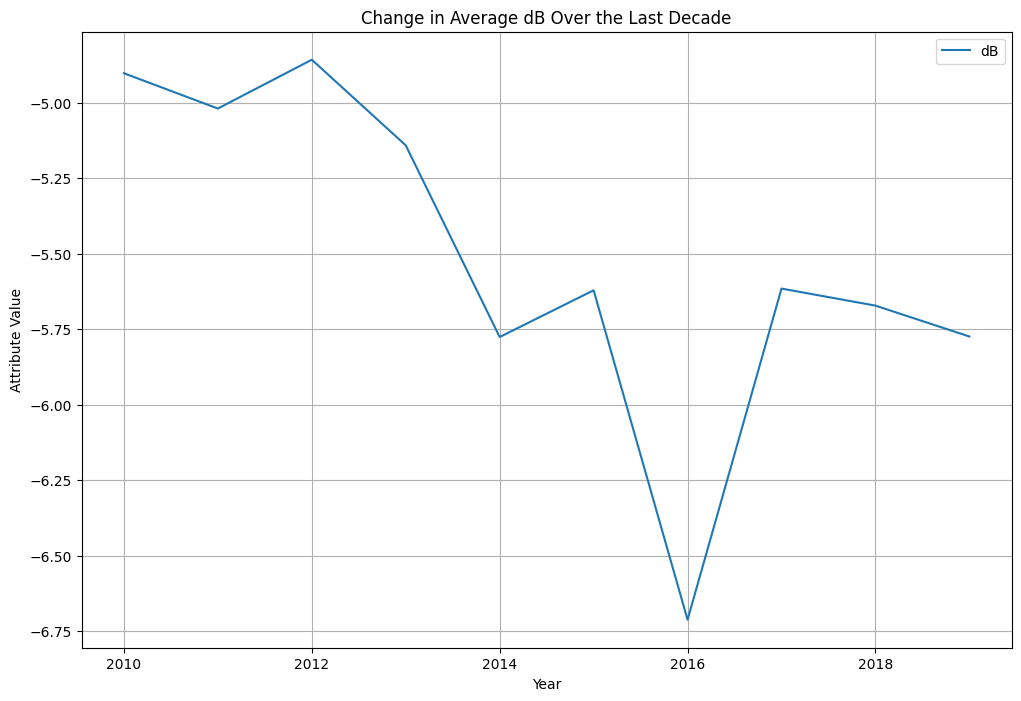

In [77]:
# Plotting line graphs for each attribute
plt.figure(figsize=(12, 8))
# Loop through each attribute and plot a line graph
attributes = ['dB']
for attribute in attributes:
    plt.plot(df_mean_attributes.index.year, df_mean_attributes[attribute], label=attribute)

plt.title('Change in Average dB Over the Last Decade')
plt.xlabel('Year')
plt.ylabel('Attribute Value')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

The average value of dB has a downwards trend across the decade, with a larger change before and after 2016. This may be due to particular music trends at the time.

### Further looking into how durations have changed over the years

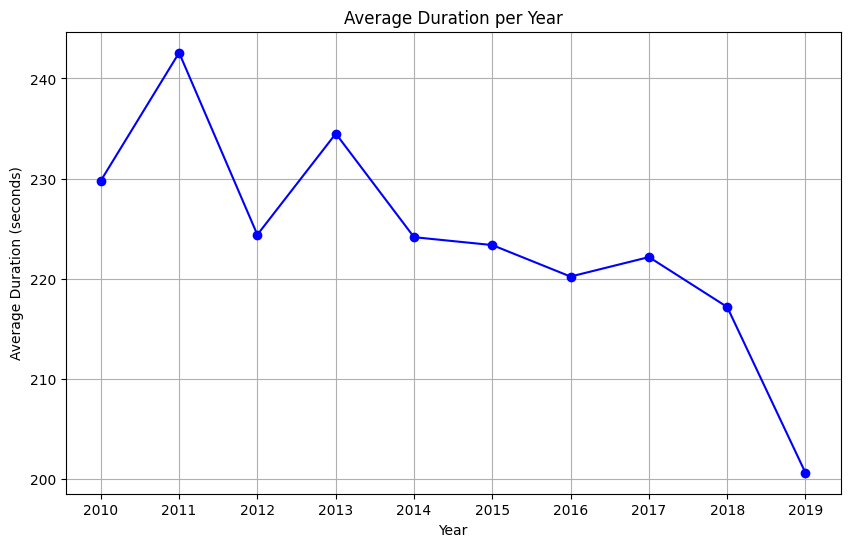

In [78]:
# Group by year and calculate the average duration for each year
average_duration_per_year = df_top10.groupby('year')['dur'].mean()

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(average_duration_per_year.index, average_duration_per_year.values, marker='o', linestyle='-', color='b')
plt.title('Average Duration per Year')
plt.xlabel('Year')
plt.ylabel('Average Duration (seconds)')
plt.grid(True)
plt.show()

**INSIGHTS:**
*Further examining the trend found in the previous graph, song duration has decreased over time. The longest average song length was in 2011, at ~250s average duration, in 2019 this was ~200s, a reduction of 50s.*

### **Popular genres over the years**

In [79]:
df_top10['year'] = df_top10['year'].dt.year

<Figure size 1500x1000 with 0 Axes>

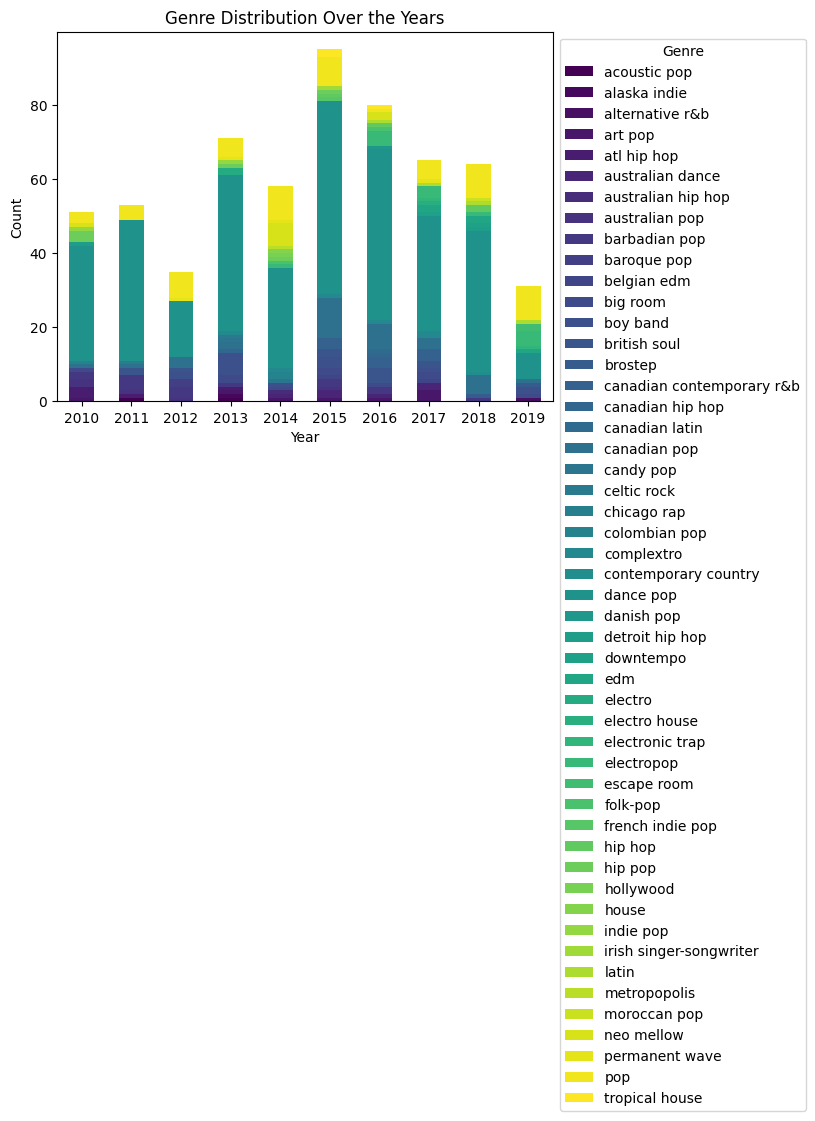

In [80]:
# Count the occurrences of each genre per year
genre_counts = df_top10.groupby(['year', 'top genre']).size().reset_index(name='count')

# Pivot the data for a stacked bar chart
genre_counts_pivot = genre_counts.pivot(index='year', columns='top genre', values='count').fillna(0)


# Plotting a stacked bar chart
plt.figure(figsize=(15, 10))
genre_counts_pivot.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Genre Distribution Over the Years')
plt.xlabel('Year')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.legend(title='Genre', bbox_to_anchor=(1, 1))
plt.show()


**INSIGHTS:**
*Large number of genres included in dataset and colours used in graph makes it difficult to fully interpret the link between genre and popularities between 2010 and 2019.*

Reducing occurences of pop sub genres to just one genre and showing the top three genres per year





In [81]:
# Creating a new column 'main_genre' by extracting the main genre
df_top10['main_genre'] = df_top10['top genre'].apply(lambda x: 'Pop' if 'pop' in x.lower() else x)

# Displaying the 'main_genre' column
print(df_top10[['year', 'main_genre']])

     year       main_genre
0    2010       neo mellow
1    2010  detroit hip hop
2    2010              Pop
3    2010              Pop
4    2010              Pop
..    ...              ...
598  2019              Pop
599  2019              Pop
600  2019              Pop
601  2019              Pop
602  2019              Pop

[603 rows x 2 columns]


<ipython-input-82-a6ae9aa4f51b>:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('Set3')


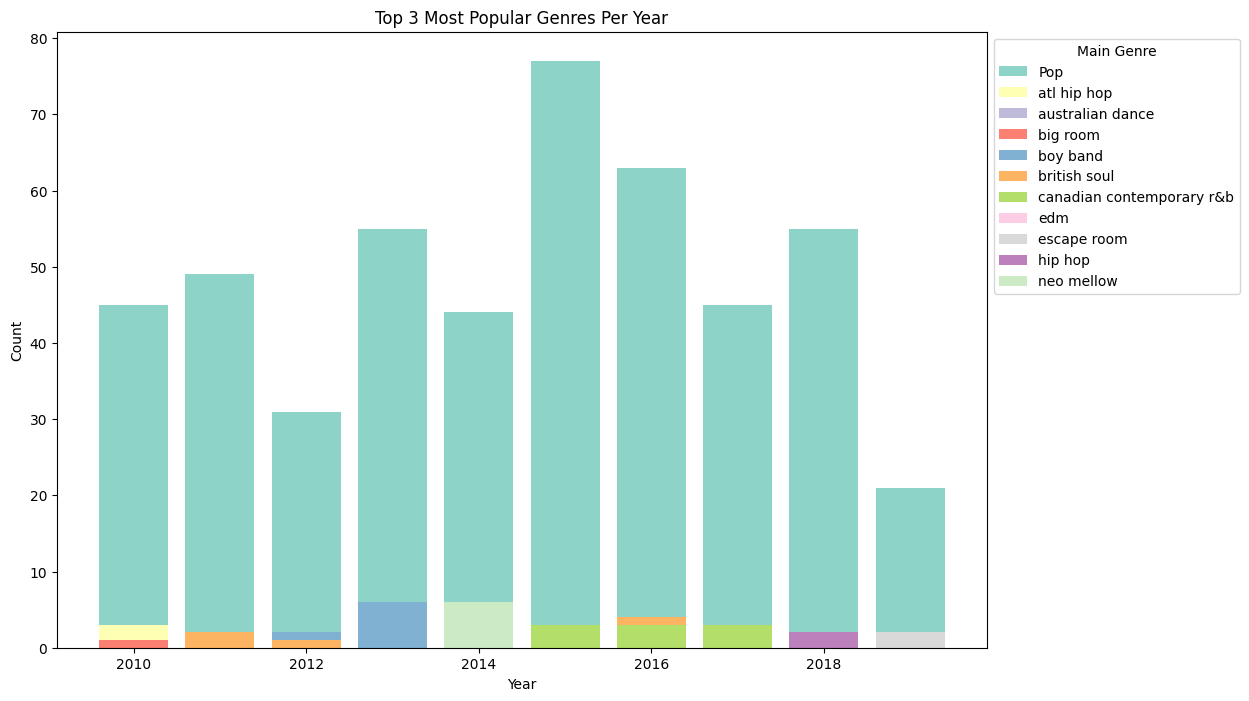

In [82]:
# Creating a new column 'main_genre' by extracting the main genre
df_top10['main_genre'] = df_top10['top genre'].apply(lambda x: 'Pop' if 'pop' in x.lower() else x)

# Count the occurrences of each main genre per year
genre_counts = df_top10.groupby(['year', 'main_genre']).size().reset_index(name='count')

# Find the most popular main genres for each year
top_genres_per_year = genre_counts.groupby('year', group_keys=False).apply(lambda x: x.nlargest(3, 'count')).reset_index(drop=True)

# Plotting the most popular main genres per year with a custom color palette
fig, ax = plt.subplots(figsize=(12, 8))

# Creating a stacked bar chart with a custom color palette
cmap = get_cmap('Set3')
colors = [cmap(i) for i in range(len(top_genres_per_year['main_genre'].unique()))]

for i, (name, group) in enumerate(top_genres_per_year.groupby('main_genre')):
    ax.bar(group['year'], group['count'], label=name, color=colors[i])

plt.title('Top 3 Most Popular Genres Per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Main Genre', bbox_to_anchor=(1, 1))
plt.show()

**INSIGHTS:**
*Unsurprisingly, the Pop genre has the greatest popularity betweeen 2010-2019. In 2015-2017, Canadian Contemporary R&B appeared as one of the most popular genres - this may be explained by the rise of Canadian music artists, including Drake, Justin Bieber, and The Weeknd.*

<ipython-input-83-c84a2c769cc6>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('Dark2')


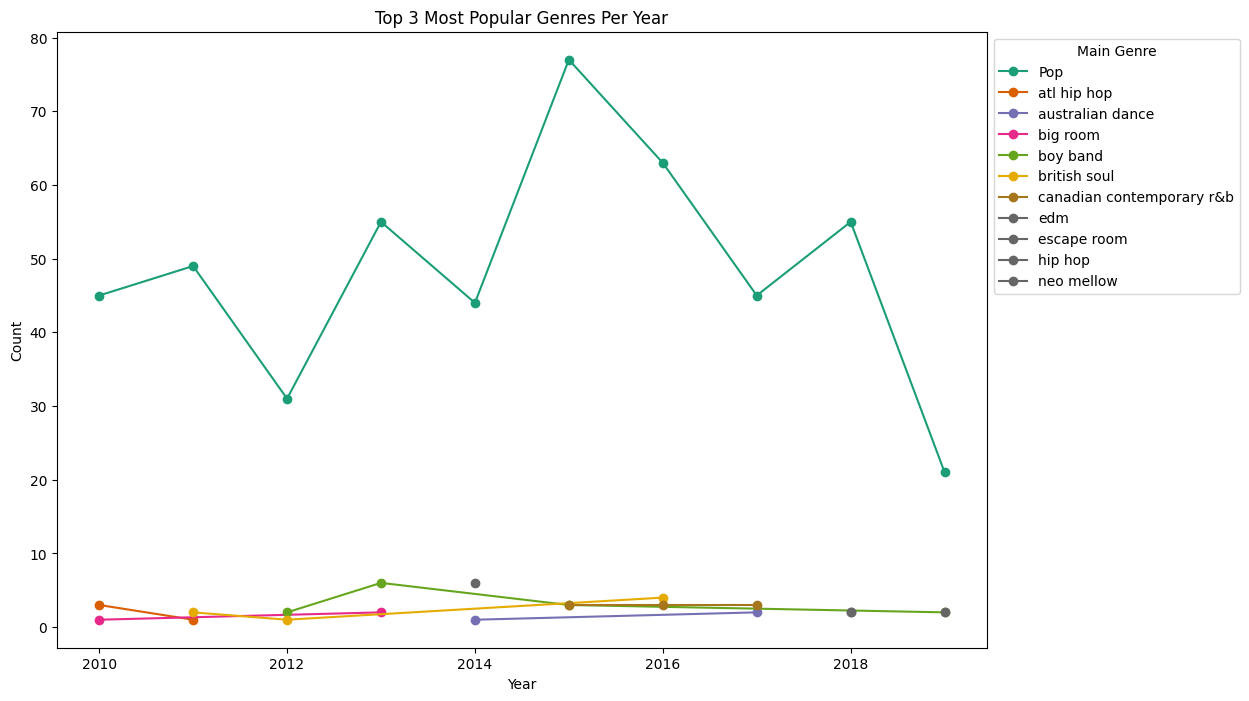

In [83]:
# Plotting the most popular main genres per year with a line graph
fig, ax = plt.subplots(figsize=(12, 8))

# Using a custom color palette
cmap = get_cmap('Dark2')
colors = [cmap(i) for i in range(len(top_genres_per_year['main_genre'].unique()))]

# Loop through each main genre to create a line for each genre
for i, (name, group) in enumerate(top_genres_per_year.groupby('main_genre')):
    ax.plot(group['year'], group['count'], label=name, marker='o', color=colors[i])

plt.title('Top 3 Most Popular Genres Per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Main Genre', bbox_to_anchor=(1, 1))
plt.show()

**INSIGHT:**
*While Pop has fluctuated more than the other genres in the Top 3 most popular genres, it continues to dominate.*

### Using Last.fm API to see current top genres

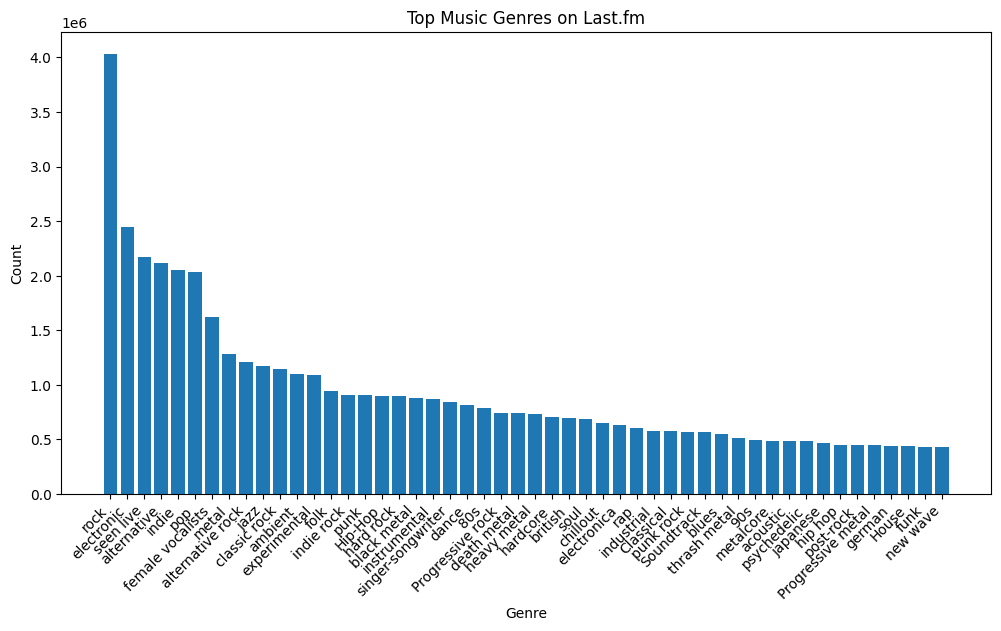

In [84]:
API_KEY = '2d5879329d1dd4e38f771a18bb395daf'


tags_endpoint = f'http://ws.audioscrobbler.com/2.0/?method=tag.getTopTags&api_key={API_KEY}&format=json'
tags_response = requests.get(tags_endpoint)
tags_data = tags_response.json()


tag_names = [tag['name'] for tag in tags_data['toptags']['tag']]
tag_counts = [int(tag['count']) for tag in tags_data['toptags']['tag']]

df_tags = pd.DataFrame({'Genre': tag_names, 'Count': tag_counts})

plt.figure(figsize=(12, 6))
plt.bar(df_tags['Genre'], df_tags['Count'])
plt.xticks(rotation=45, ha='right')
plt.title('Top Music Genres on Last.fm')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

The barchart visualizes the distribution of top music genres based on Last.fm's data.
It provides a quick overview of the popularity of different genres.The most popular is rock.The second most popular is electronic music.


### Seeing which artists that are currently in the top 50 charts (according to Last FM) have previously been in the top 10s from 2010-2019

In [85]:
API_KEY = '2d5879329d1dd4e38f771a18bb395daf'

top_50_today_endpoint = f'https://ws.audioscrobbler.com/2.0/?method=chart.gettoptracks&api_key={API_KEY}&format=json'

top_50_response = requests.get(top_50_today_endpoint)
top_50 = top_50_response.json()

In [86]:
all_tracks = top_50['tracks']

tracks = []
artists = []
for i in range(50):
  tracks.append(all_tracks['track'][i]['name'])
  artists.append(all_tracks['track'][i]['artist']['name'])

unique = set(artists)
unique = [artist.upper() for artist in unique]

top50_artists = pd.DataFrame(unique, columns=['artist'])

In [87]:
t10_artists = df_top10['artist'].unique()
t10_artists = [artist.upper() for artist in t10_artists]

In [88]:
# Merging datasets
top10_oftodaytop50 = top50_artists.merge(df_top10[['artist','year']], on='artist', how='left')
# Dropping rows where artists from the top 50 aren't in the 2010-2019 dataset
top10_oftodaytop50.dropna(subset = ['year'], inplace=True)
top10_oftodaytop50['year'] = top10_oftodaytop50['year'].astype(int)

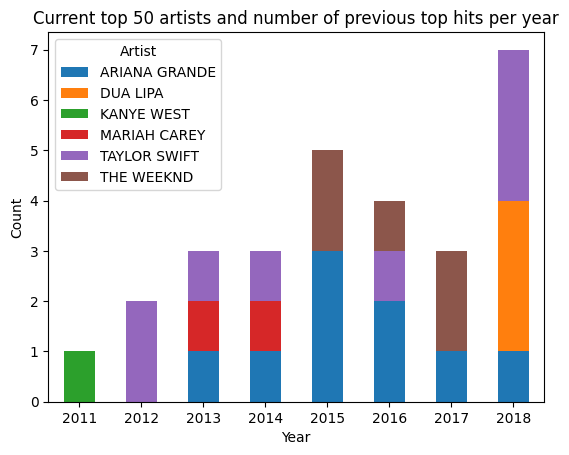

In [89]:
top10_oftodaytop50.groupby(['year', 'artist']).size().unstack().plot(kind='bar', stacked=True)

plt.xlabel('Year')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.legend(title='Artist')
plt.title('Current top 50 artists and number of previous top hits per year')
plt.show()


The graph above shows which artists have appeared in the yearly top chart over the previous decade, and with how many songs.

## Is there any correlation between song attributes and the song being 'Shazamed’?

### Exploratory analysis

In [90]:
df_spotify23.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

We wanted to see how the number of songs shazamed has changed in time based on spotify23 data set.

So we checked how many track each year have in the data.

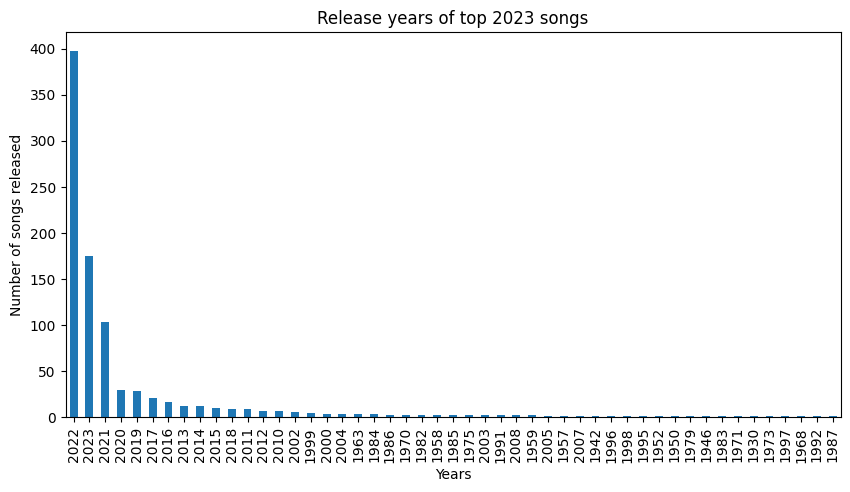

In [91]:
# Count the number of tracks for each release year
track_counts = df_spotify23['released_year'].value_counts()
track_counts.plot(kind='bar', figsize=(10,5))
plt.xlabel("Years")
plt.ylabel("Number of songs released")
plt.title("Release years of top 2023 songs")
plt.show()

It is noticeable that the majority of songs on the top 2023 charts were released in 2022, followed by those released in 2023. Whilst this could be due to the timing of data recording during 2023, this may also be because 2022 songs are still circulating and widely listened to this year due to these songs being both recent and highly familiarity.

### Investigating correlation between Shazam charts and attributes

Next, is to investigate the relationship between music attributes such as danceability or instumentalness and being in shazam charts. Songs that are shazamed more gain higher ranking on the Shazam charts.
We examined data types of the variables.

In [92]:
df_spotify23['in_shazam_charts'].head()

0    826.0
1    382.0
2    949.0
3    548.0
4    425.0
Name: in_shazam_charts, dtype: float64

In [93]:
df_spotify23['in_shazam_charts'].tail()

948    0.0
949    0.0
950    0.0
951    0.0
952    0.0
Name: in_shazam_charts, dtype: float64

In [94]:
print(df_spotify23['in_shazam_charts'].dtype)
print(df_spotify23['in_shazam_charts'].head())

float64
0    826.0
1    382.0
2    949.0
3    548.0
4    425.0
Name: in_shazam_charts, dtype: float64


In [95]:
df_spotify23['in_shazam_charts'].describe()

count    896.000000
mean      51.176339
std      126.487856
min        0.000000
25%        0.000000
50%        2.000000
75%       36.000000
max      953.000000
Name: in_shazam_charts, dtype: float64

In [96]:
selected_columns = ['in_shazam_charts', 'bpm','key','mode','danceability_%','valence_%','energy_%','acousticness_%','instrumentalness_%','liveness_%','speechiness_%']

In [97]:
correlation_matrix=df_spotify23[selected_columns].corr()
correlation_matrix

<ipython-input-97-f3a349a1d798>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix=df_spotify23[selected_columns].corr()


in_shazam_charts       bpm  danceability_%  valence_%  \
in_shazam_charts            1.000000  0.077397       -0.009184  -0.016684   
bpm                         0.077397  1.000000       -0.141016   0.039342   
danceability_%             -0.009184 -0.141016        1.000000   0.403818   
valence_%                  -0.016684  0.039342        0.403818   1.000000   
energy_%                    0.100179  0.022612        0.190949   0.363502   
acousticness_%             -0.075453 -0.014353       -0.237300  -0.081976   
instrumentalness_%         -0.017758 -0.001492       -0.091426  -0.136215   
liveness_%                 -0.060284  0.002225       -0.083020   0.011486   
speechiness_%              -0.068962  0.031049        0.187087   0.038050   

                    energy_%  acousticness_%  instrumentalness_%  liveness_%  \
in_shazam_charts    0.100179       -0.075453           -0.017758   -0.060284   
bpm                 0.022612       -0.014353           -0.001492    0.002225   
danceability_%      0.190949       -0.237300           -0.091426   -0.083020   
valence_%           0.363502       -0.081976           -0.136215    0.011486   
energy_%            1.000000       -0.568865           -0.041635    0.121183   
acousticness_%     -0.568865        1.000000            0.046344   -0.052860   
instrumentalness_% -0.041635        0.046344            1.000000   -0.045243   
liveness_%          0.121183       -0.052860           -0.045243    1.000000   
speechiness_%      -0.006480       -0.021535           -0.085581   -0.031121   

                    speechiness_%  
in_shazam_charts        -0.068962  
bpm                      0.031049  
danceability_%           0.187087  
valence_%                0.038050  
energy_%                -0.006480  
acousticness_%          -0.021535  
instrumentalness_%      -0.085581  
liveness_%              -0.031121  
speechiness_%            1.000000

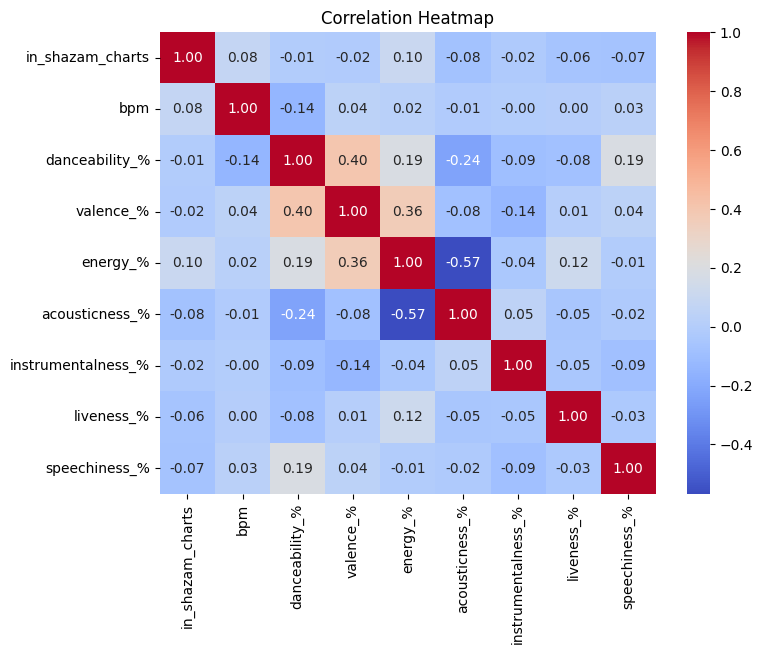

In [98]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Based on this heatmatrix, there is no direct correlation between any of these features and appearing in shazam charts based on this data.

<function matplotlib.pyplot.show(close=None, block=None)>

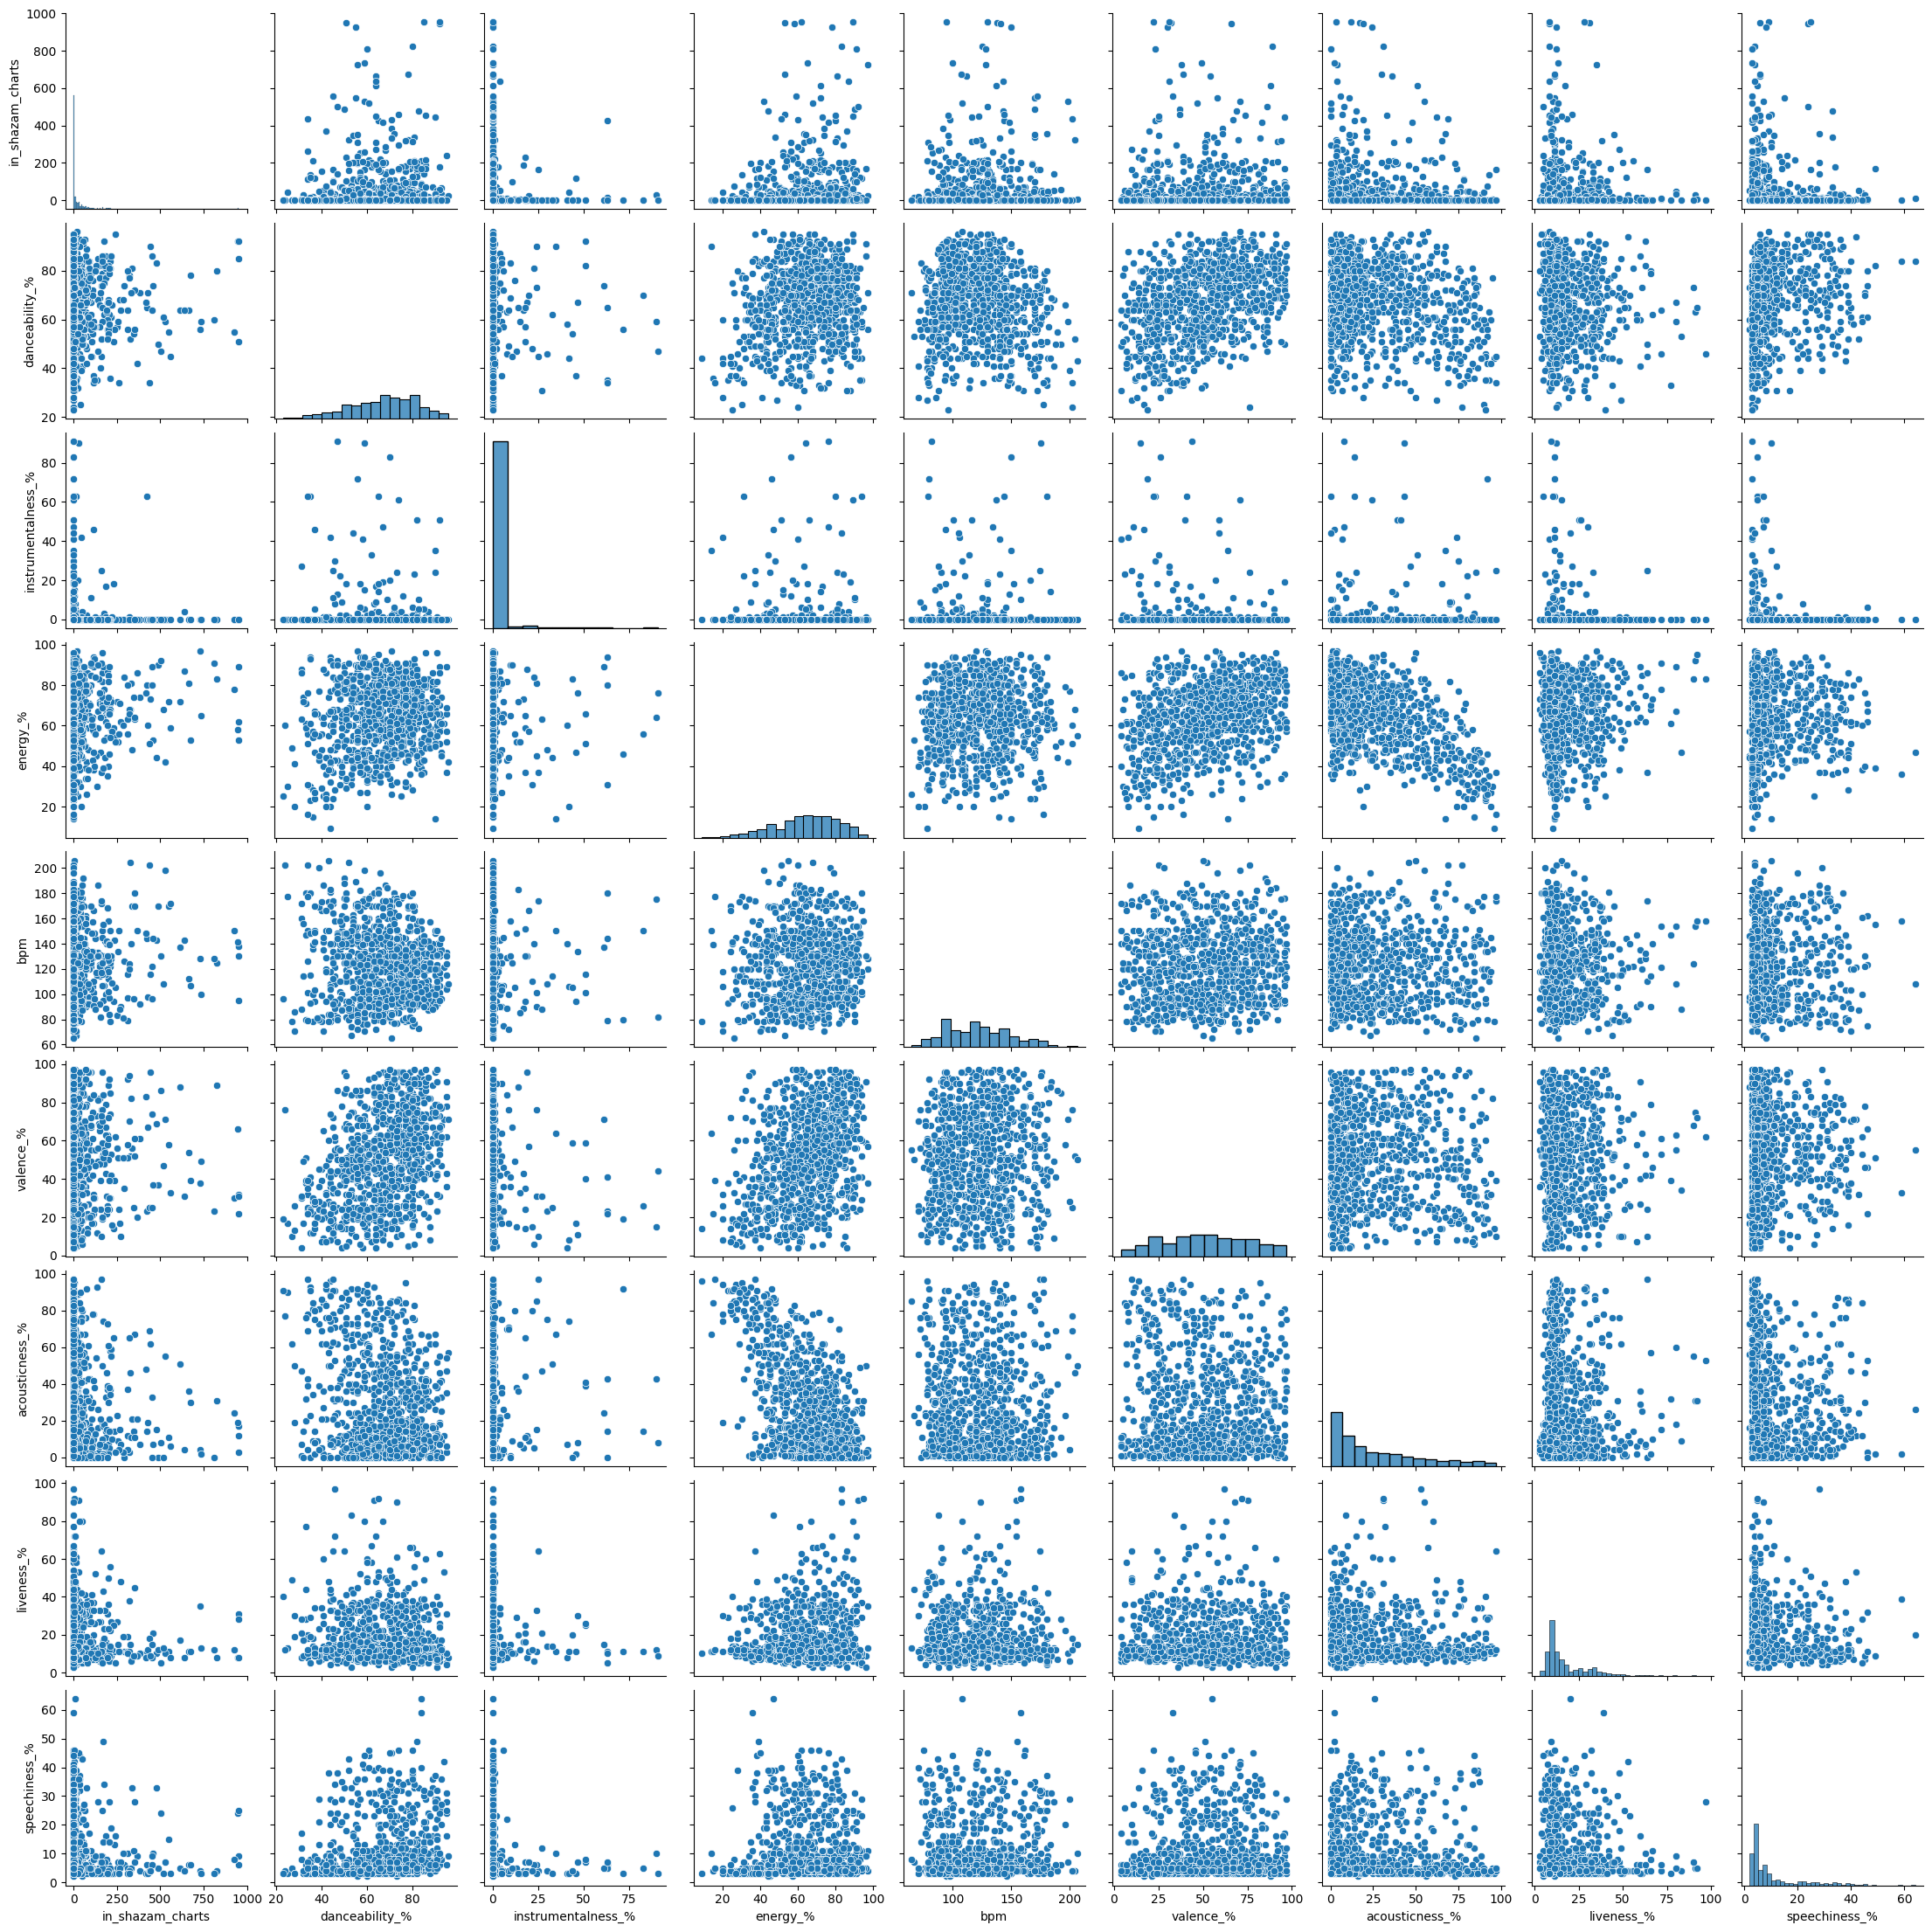

In [99]:
columns_to_plot=['in_shazam_charts', 'danceability_%','instrumentalness_%','energy_%','bpm', 'valence_%','acousticness_%', 'liveness_%', 'speechiness_%']
sns.pairplot(df_spotify23[columns_to_plot])
plt.show

We created pairplots to look into dynamics of relationships further in the database.

### Investigating link between Spotify, Shazam and Apple charts

In [100]:
selected_columns2 = ['in_spotify_charts', 'in_shazam_charts' ,'in_apple_charts' ]

In [101]:
correlation_matrix2=df_spotify23[selected_columns2].corr()
print(correlation_matrix2)

                   in_spotify_charts  in_shazam_charts  in_apple_charts
in_spotify_charts           1.000000          0.547796         0.562907
in_shazam_charts            0.547796          1.000000         0.412293
in_apple_charts             0.562907          0.412293         1.000000


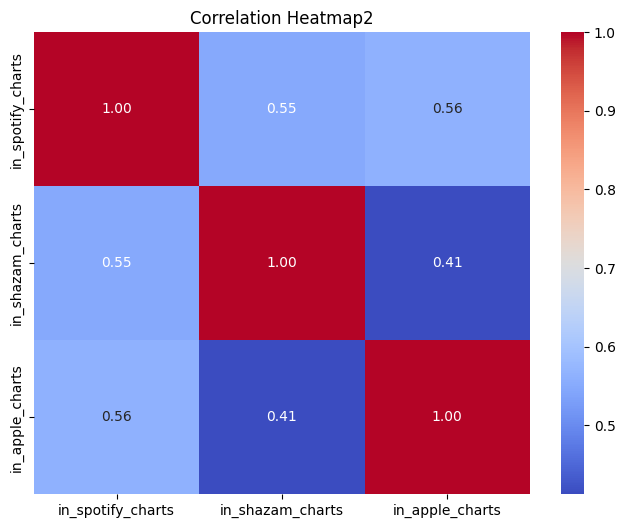

In [102]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap2')
plt.show()

The correlation matrix is a square matrix that shows the correlation coefficients between each pair of variables. In this case, it would show the correlation between the 'in_apple_charts' and 'in_spotify_charts' columns. The values in the matrix range from -1 to 1, where 1 indicates a perfect positive correlation, -1 indicates a perfect negative correlation, and 0 indicates no correlation.Here the relevant value is 0.55 indicating some correlation.

There is moderate postiive correlation between different charts as to be expected, with similar  correlation between Spotify and Apple charts, and Spotify and Shazam charts. However, Apple and Shazam charts are slightly less correlated. It is likely this is because Spotify has the largest streaming base, and all other charts are likely to correlate with this. However, between the two smaller charts there are more noticeable discrepancies, leading to less correlation.

Confirming results using numpy.

In [103]:
# Extract NumPy array from DataFrame
data_array1 = df_spotify23['in_apple_charts']
data_array2= df_spotify23['in_spotify_charts']

# Calculate correlation matrix using NumPy
correlation_matrix = np.corrcoef(data_array1,data_array2)

print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
[[1.        0.5629068]
 [0.5629068 1.       ]]


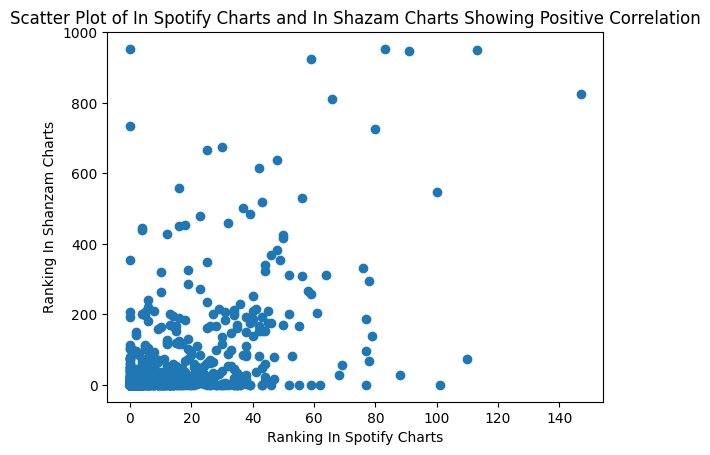

In [104]:
plt.scatter(df_spotify23['in_spotify_charts'], df_spotify23['in_shazam_charts'])
plt.xlabel('Ranking In Spotify Charts')
plt.ylabel('Ranking In Shanzam Charts')
plt.title('Scatter Plot of In Spotify Charts and In Shazam Charts Showing Positive Correlation')
plt.show()